In [11]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [12]:
csv_path = '/Users/mpillodi/documents/GitHub/wind-data-analysis/csvfolder/2013_03_04_0000.csv'

In [13]:
df = pd.read_csv(csv_path)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 44 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    144 non-null    object 
 1   time    144 non-null    object 
 2   period  144 non-null    int64  
 3   s1a     144 non-null    float64
 4   s1x     144 non-null    float64
 5   s1i     144 non-null    float64
 6   s1s     144 non-null    float64
 7   s2a     144 non-null    float64
 8   s2x     144 non-null    float64
 9   s2i     144 non-null    float64
 10  s2s     144 non-null    float64
 11  s3a     144 non-null    float64
 12  s3x     144 non-null    float64
 13  s3i     144 non-null    float64
 14  s3s     144 non-null    float64
 15  d1a     144 non-null    int64  
 16  d1s     144 non-null    int64  
 17  d2a     144 non-null    int64  
 18  d2s     144 non-null    int64  
 19  h1a     144 non-null    int64  
 20  h1x     144 non-null    int64  
 21  h1i     144 non-null    int64  
 22  t1

In [14]:
# Convert 'date' and 'time' columns to datetime format and set as index
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)
df.head()

date      time  period       s1a      s1x      s1i  \
datetime                                                                        
2013-03-04 00:10:00  2013-03-04  00:10:00     600  10.60817  13.0271   8.9420   
2013-03-04 00:20:00  2013-03-04  00:20:00     600  10.80554  12.5681   9.4010   
2013-03-04 00:30:00  2013-03-04  00:30:00     600  11.00750  12.6140   9.4010   
2013-03-04 00:40:00  2013-03-04  00:40:00     600  11.52158  12.7976   9.9518   
2013-03-04 00:50:00  2013-03-04  00:50:00     600  11.76485  13.3943  10.1354   

                         s1s       s2a      s2x     s2i  ...  tii  vxa  vxx  \
datetime                                                 ...                  
2013-03-04 00:10:00  0.67473  10.48324  12.6589  8.6656  ...   40  126  126   
2013-03-04 00:20:00  0.60588  10.67143  12.2458  9.2164  ...   40  126  126   
2013-03-04 00:30:00  0.58293  10.85962  12.4294  9.3541  ...   40  126  126   
2013-03-04 00:40:00  0.53703  11.39665  12.8425  9.8590  ...   40  126  126   
2013-03-04 00:50:00  0.50949  11.62156  13.1179  9.9508  ...   40  126  126   

                     vxi  bla  blx  bli  bra  brx  bri  
datetime                                                
2013-03-04 00:10:00  126   83   83   83   83   83   83  
2013-03-04 00:20:00  126   83   83   83   83   83   83  
2013-03-04 00:30:00  126   83   83   83   83   83   83  
2013-03-04 00:40:00  126   83   83   83   83   83   83  
2013-03-04 00:50:00  126   83   83   83   83   83   83  

[5 rows x 44 columns]


Analysis for column: s1a
Descriptive Statistics:
count    144.000000
mean       9.841799
std        1.907030
min        5.793260
25%        8.246615
50%        9.676400
75%       11.518137
max       16.120760
Name: s1a, dtype: float64


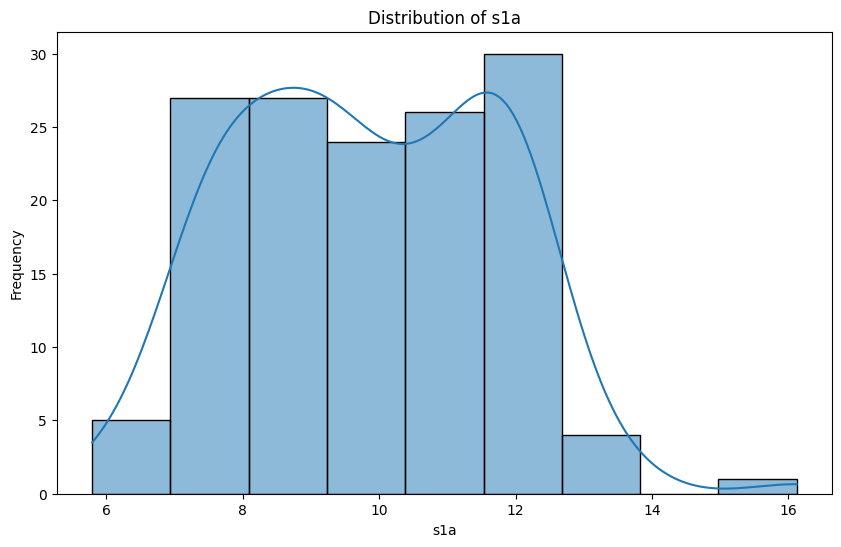


Analysis for column: s1x
Descriptive Statistics:
count    144.000000
mean      11.985425
std        2.423038
min        6.509300
25%       10.215725
50%       11.604200
75%       13.463150
max       19.131800
Name: s1x, dtype: float64


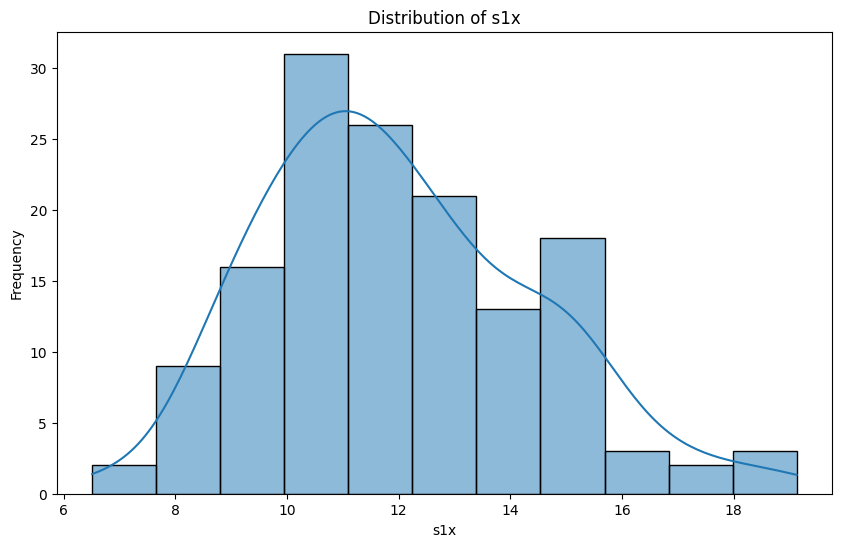


Analysis for column: s1i
Descriptive Statistics:
count    144.000000
mean       7.687400
std        1.655518
min        4.306100
25%        6.451925
50%        7.427300
75%        9.102650
max       11.787800
Name: s1i, dtype: float64


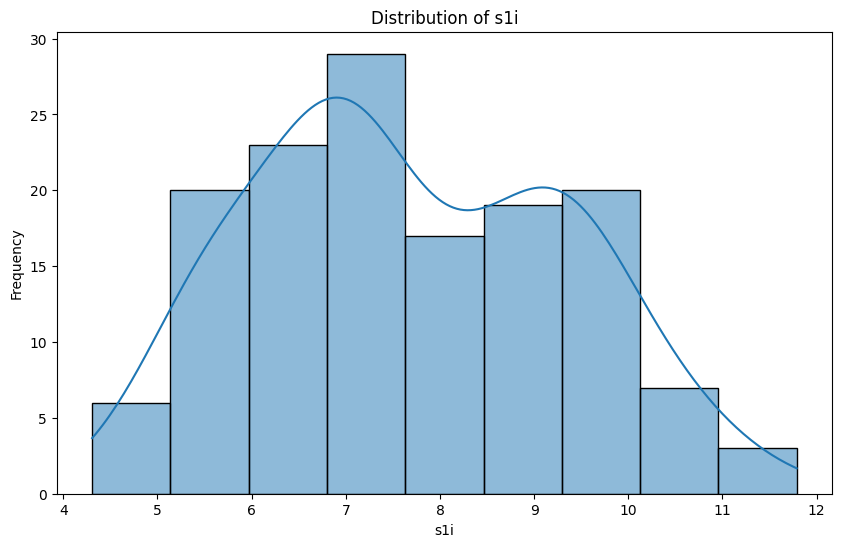


Analysis for column: s1s
Descriptive Statistics:
count    144.000000
mean       0.787217
std        0.359732
min        0.234090
25%        0.543915
50%        0.679320
75%        1.000620
max        1.868130
Name: s1s, dtype: float64


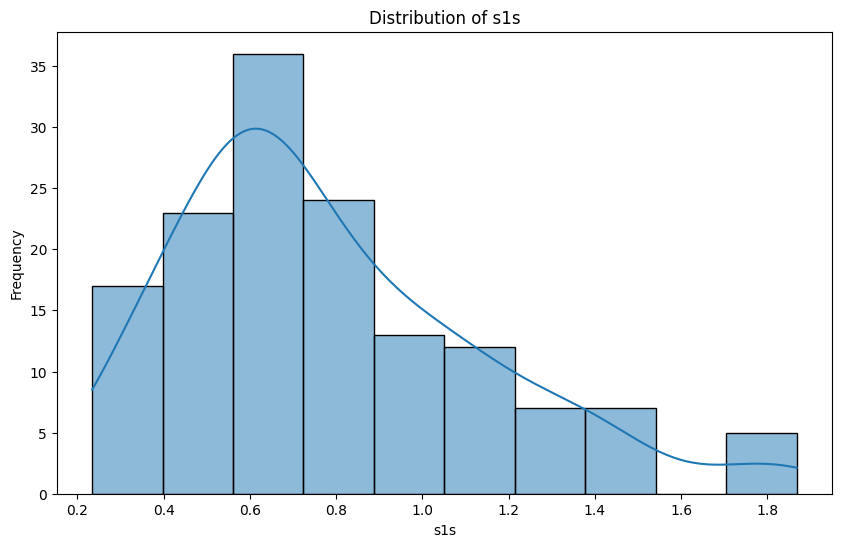


Analysis for column: s2a
Descriptive Statistics:
count    144.000000
mean       9.820591
std        1.897837
min        5.796850
25%        8.239877
50%        9.654745
75%       11.543530
max       16.124350
Name: s2a, dtype: float64


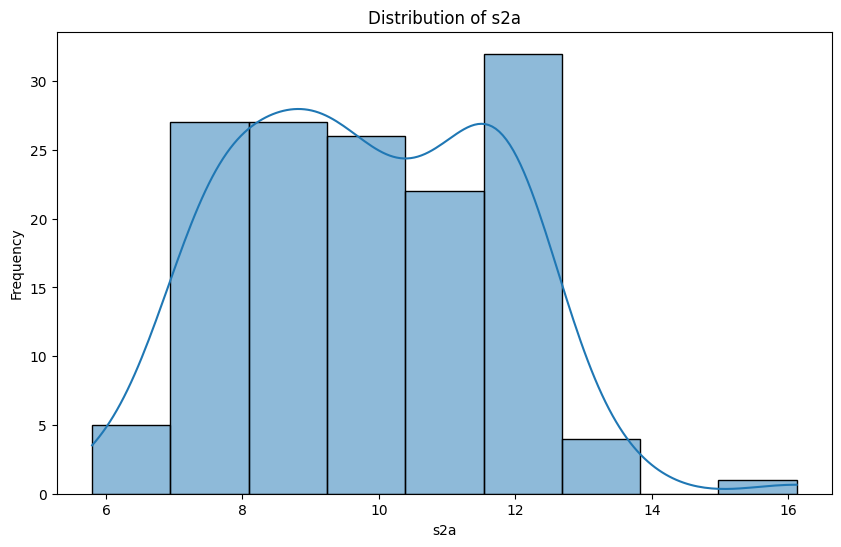


Analysis for column: s2x
Descriptive Statistics:
count    144.000000
mean      11.942350
std        2.396644
min        6.554200
25%       10.226200
50%       11.488450
75%       13.381825
max       19.130800
Name: s2x, dtype: float64


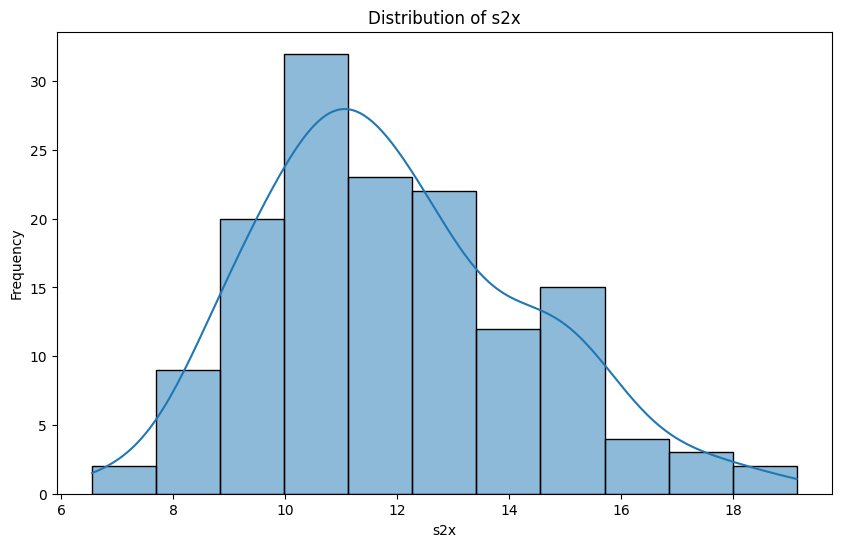


Analysis for column: s2i
Descriptive Statistics:
count    144.000000
mean       7.660262
std        1.626132
min        4.305100
25%        6.462400
50%        7.426300
75%        9.124600
max       11.740900
Name: s2i, dtype: float64


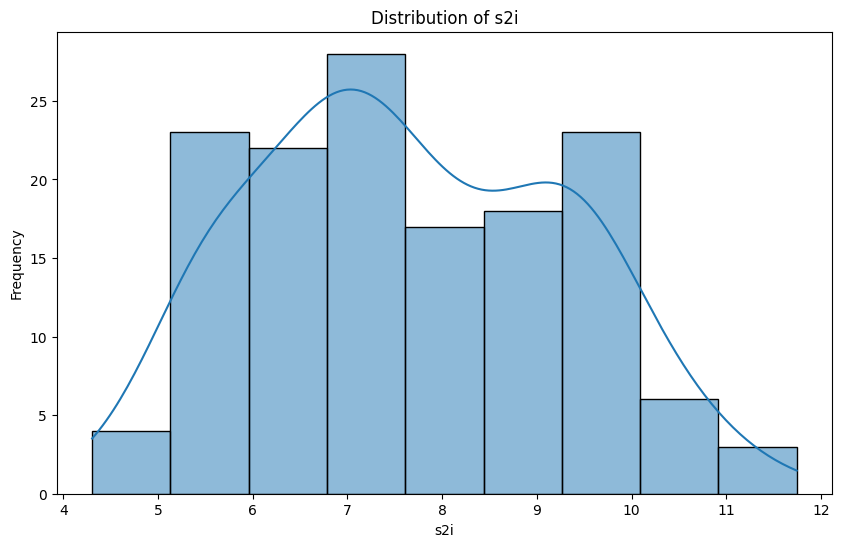


Analysis for column: s2s
Descriptive Statistics:
count    144.000000
mean       0.787791
std        0.357261
min        0.252450
25%        0.539325
50%        0.674730
75%        1.006358
max        1.849770
Name: s2s, dtype: float64


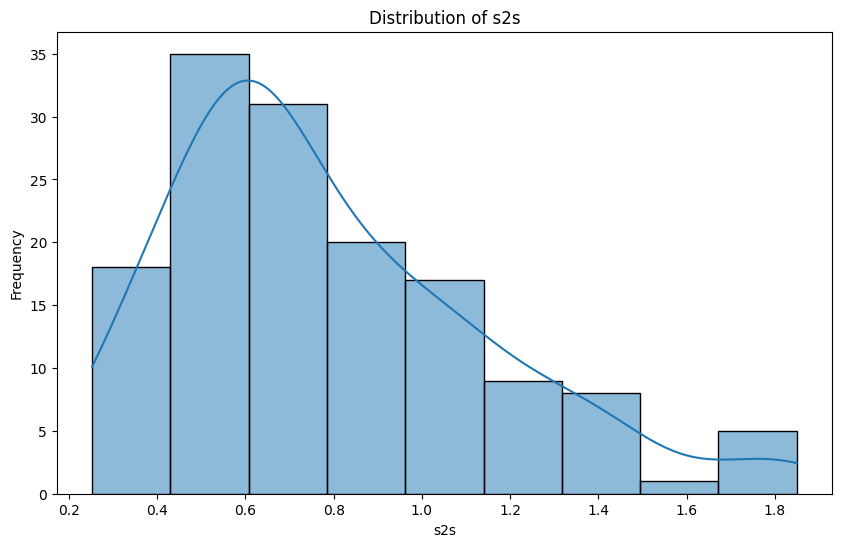


Analysis for column: s3a
Descriptive Statistics:
count    144.000000
mean       9.373460
std        1.880569
min        5.580620
25%        7.930310
50%        9.181415
75%       10.671038
max       16.061910
Name: s3a, dtype: float64


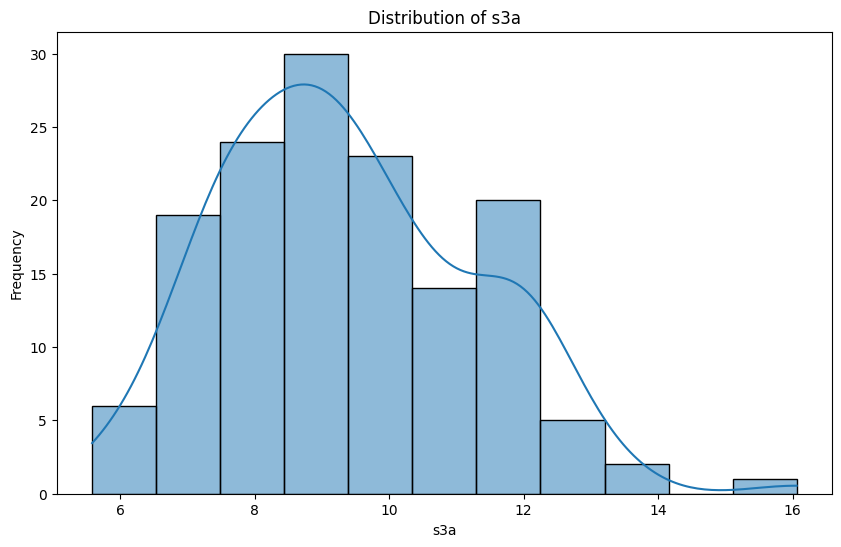


Analysis for column: s3x
Descriptive Statistics:
count    144.000000
mean      11.554164
std        2.545392
min        6.461320
25%        9.763960
50%       11.048320
75%       12.963392
max       19.350790
Name: s3x, dtype: float64


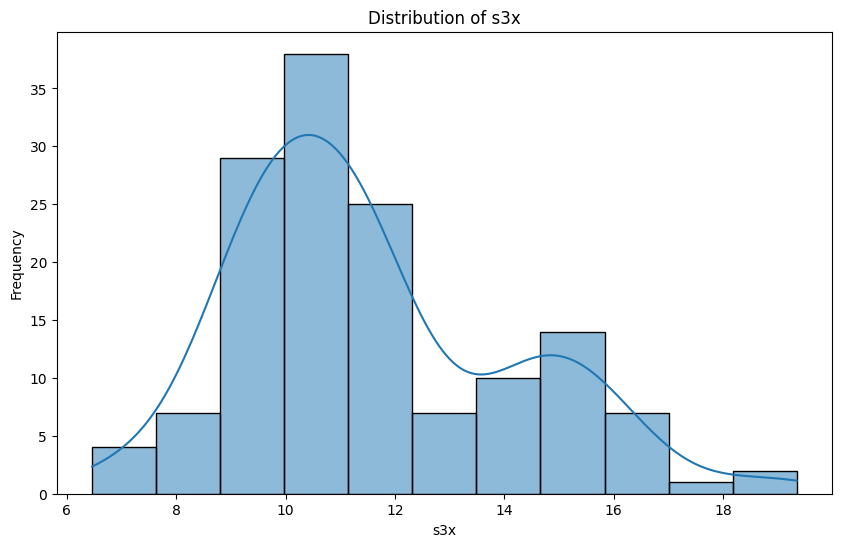


Analysis for column: s3i
Descriptive Statistics:
count    144.000000
mean       7.200018
std        1.427920
min        3.938470
25%        6.163165
50%        7.080565
75%        8.250250
max       12.424420
Name: s3i, dtype: float64


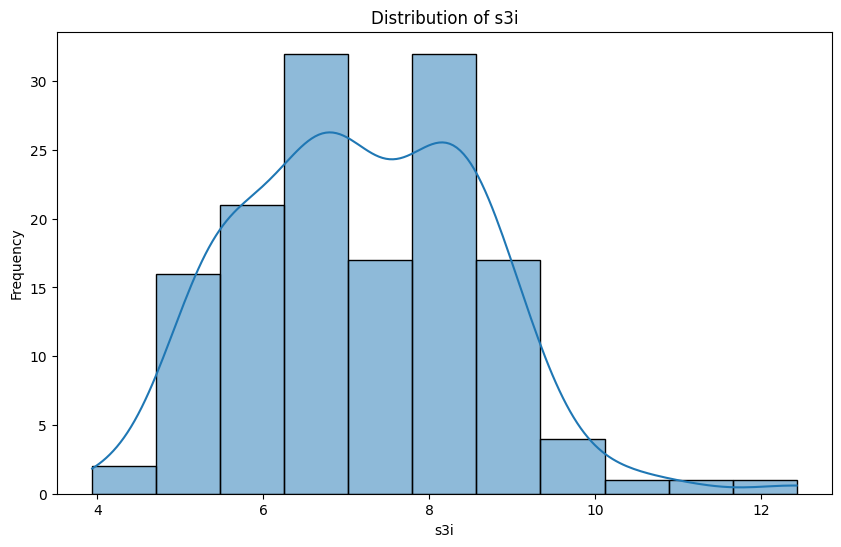


Analysis for column: s3s
Descriptive Statistics:
count    144.000000
mean       0.812600
std        0.365837
min        0.261460
25%        0.558465
50%        0.683460
75%        1.028638
max        1.917370
Name: s3s, dtype: float64


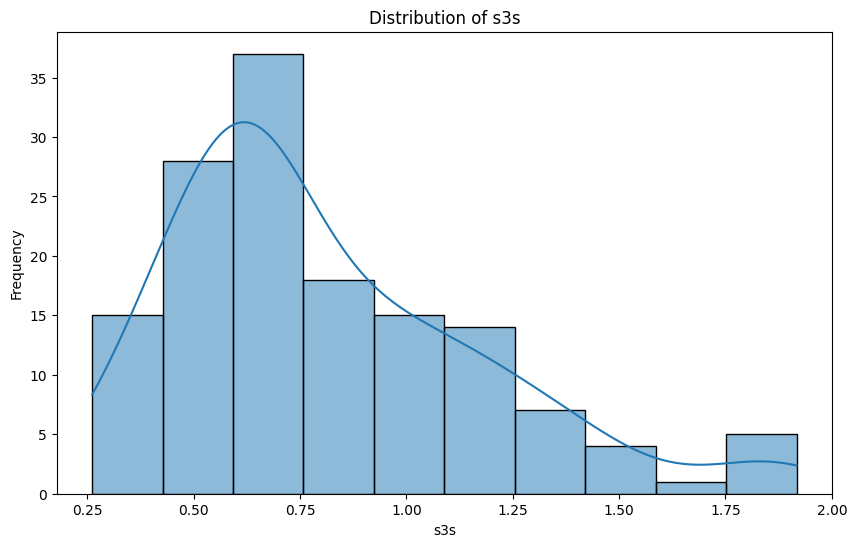


Analysis for column: d1a
Descriptive Statistics:
count    144.000000
mean     120.368056
std       23.981562
min       67.000000
25%      108.000000
50%      119.500000
75%      140.250000
max      157.000000
Name: d1a, dtype: float64


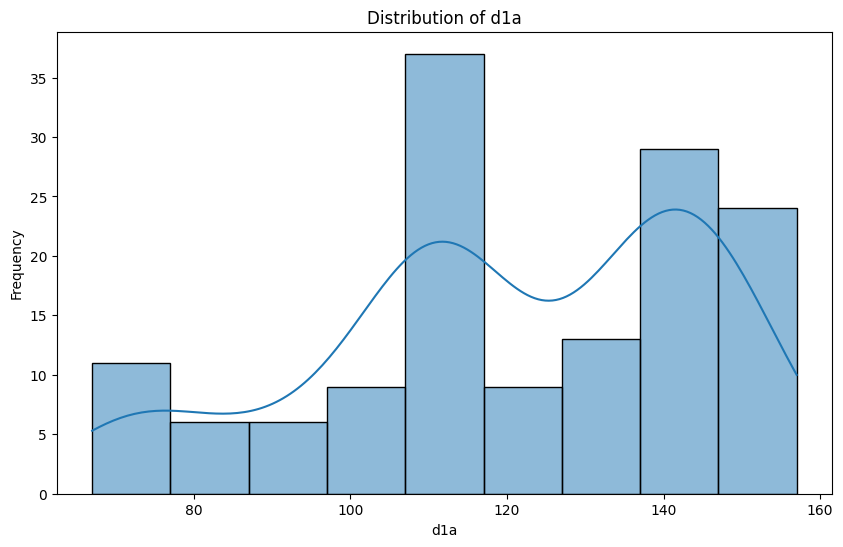


Analysis for column: d1s
Descriptive Statistics:
count    144.000000
mean       4.604167
std        2.272421
min        1.000000
25%        3.000000
50%        4.000000
75%        5.250000
max       18.000000
Name: d1s, dtype: float64


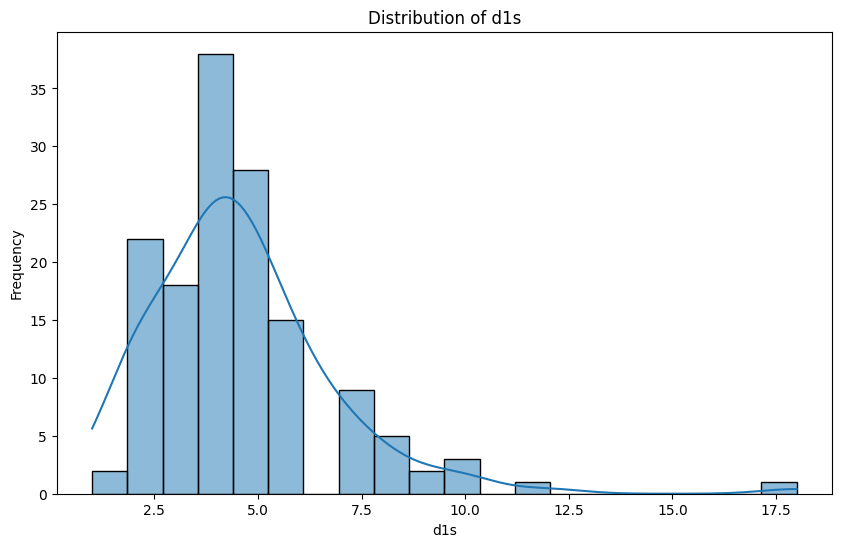


Analysis for column: d2a
Descriptive Statistics:
count    144.000000
mean     120.375000
std       24.431687
min       67.000000
25%      105.750000
50%      122.000000
75%      141.000000
max      157.000000
Name: d2a, dtype: float64


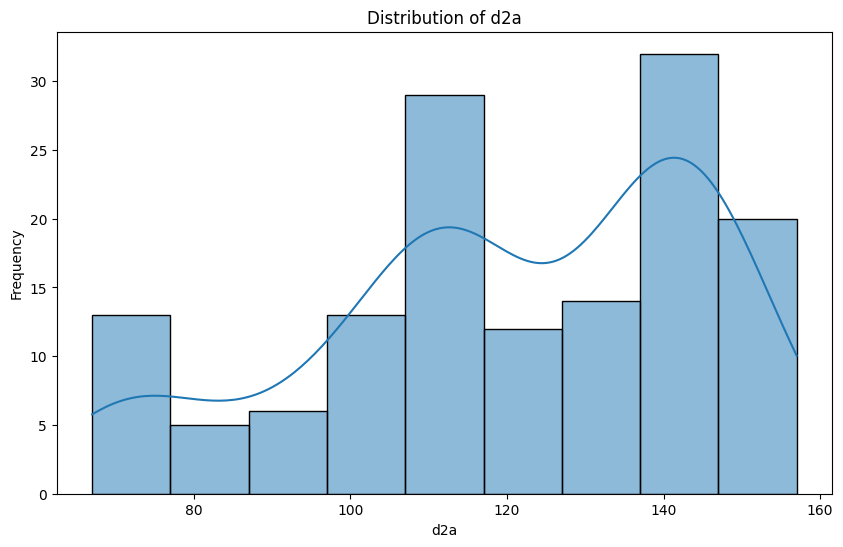


Analysis for column: d2s
Descriptive Statistics:
count    144.000000
mean       5.215278
std        2.135819
min        3.000000
25%        4.000000
50%        5.000000
75%        6.000000
max       18.000000
Name: d2s, dtype: float64


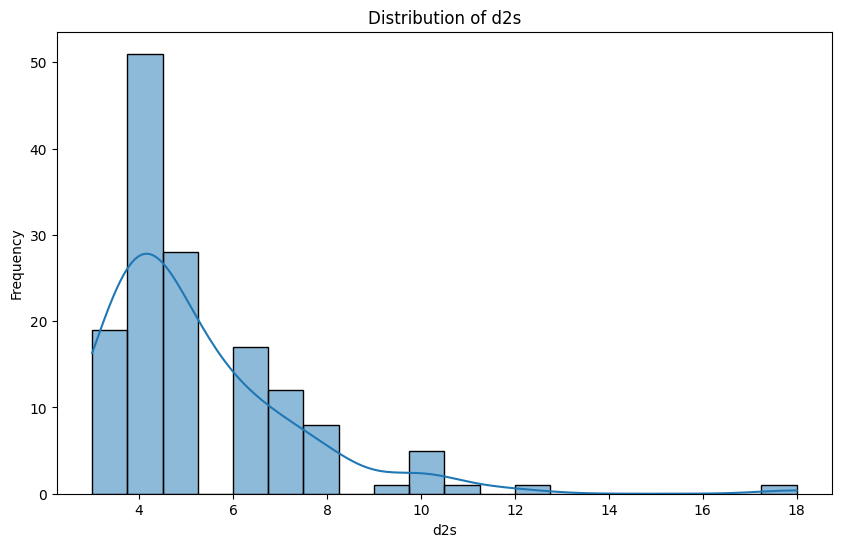


Analysis for column: h1a
Descriptive Statistics:
count    144.000000
mean      70.326389
std       16.058386
min       40.000000
25%       56.000000
50%       70.000000
75%       83.250000
max       98.000000
Name: h1a, dtype: float64


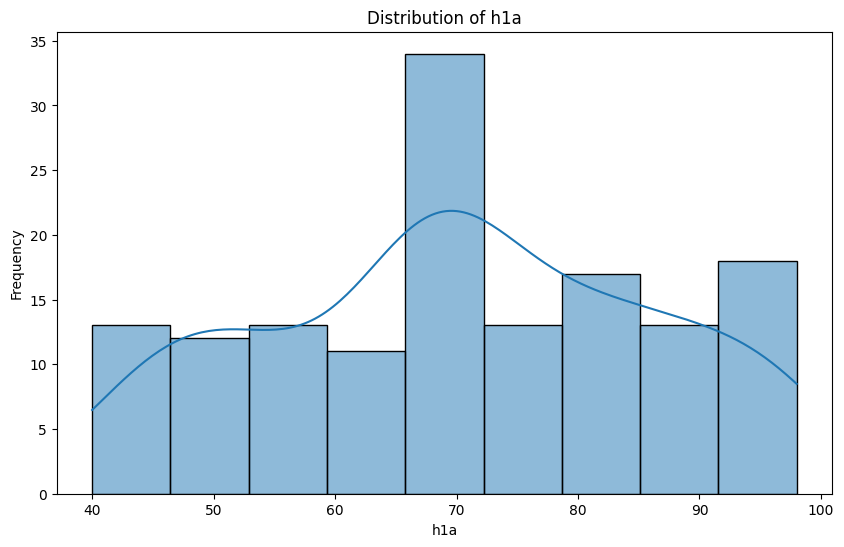


Analysis for column: h1x
Descriptive Statistics:
count    144.000000
mean      71.486111
std       15.574763
min       43.000000
25%       58.750000
50%       70.500000
75%       84.000000
max       99.000000
Name: h1x, dtype: float64


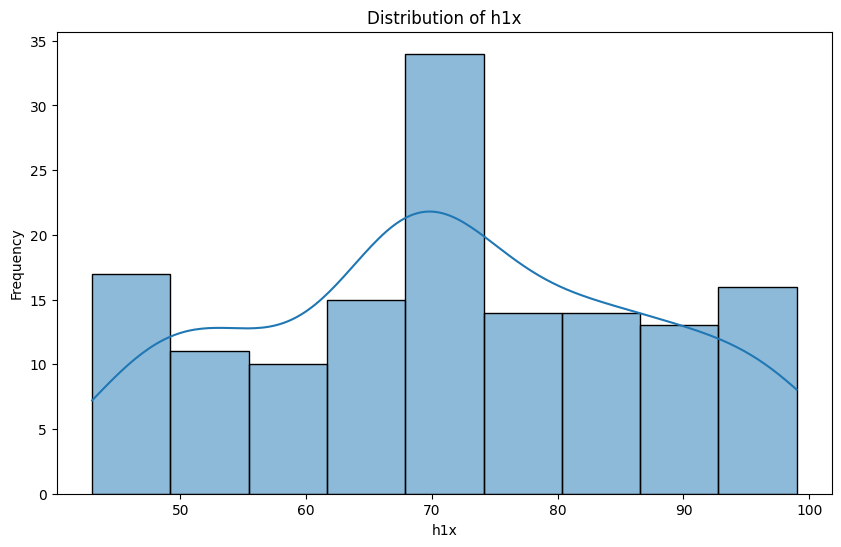


Analysis for column: h1i
Descriptive Statistics:
count    144.000000
mean      69.152778
std       16.564061
min       37.000000
25%       55.000000
50%       69.000000
75%       82.000000
max       98.000000
Name: h1i, dtype: float64


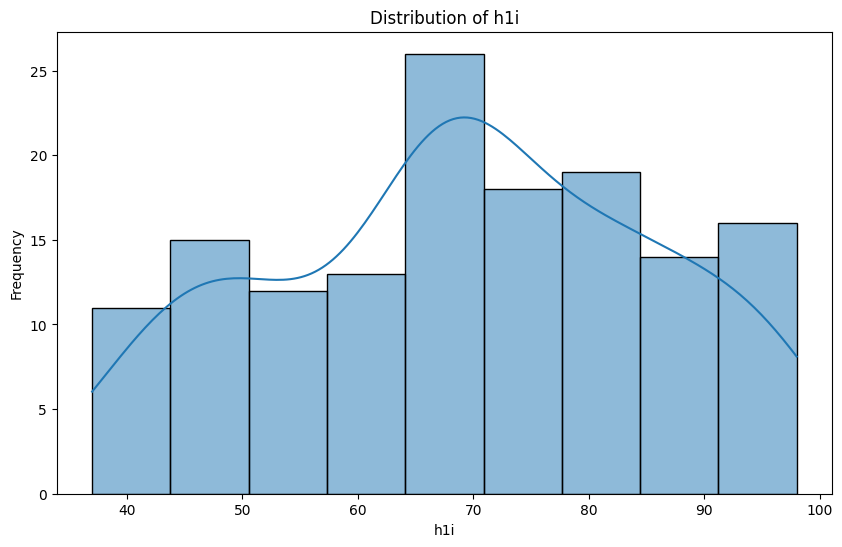


Analysis for column: t1a
Descriptive Statistics:
count    144.000000
mean       0.642361
std        2.250379
min       -4.150000
25%       -0.550000
50%        0.350000
75%        2.600000
max        4.350000
Name: t1a, dtype: float64


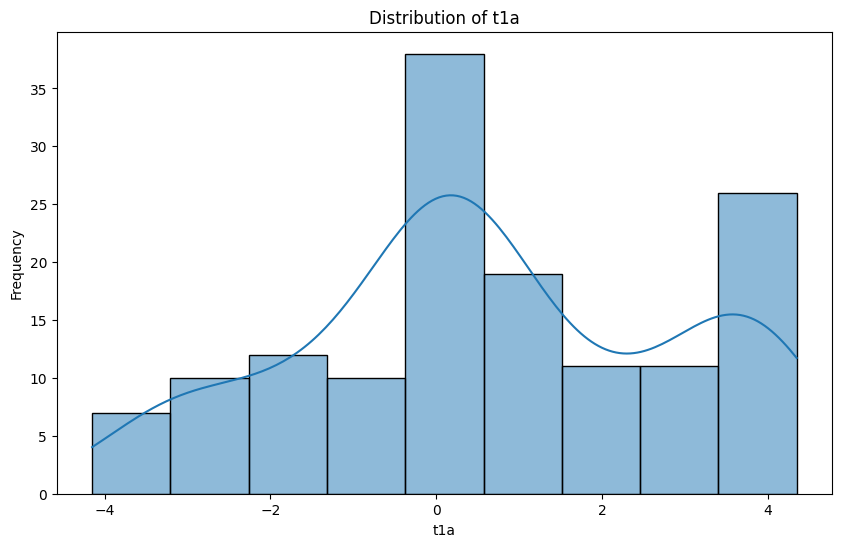


Analysis for column: t1x
Descriptive Statistics:
count    144.000000
mean       0.743056
std        2.286771
min       -3.950000
25%       -0.400000
50%        0.450000
75%        2.875000
max        4.450000
Name: t1x, dtype: float64


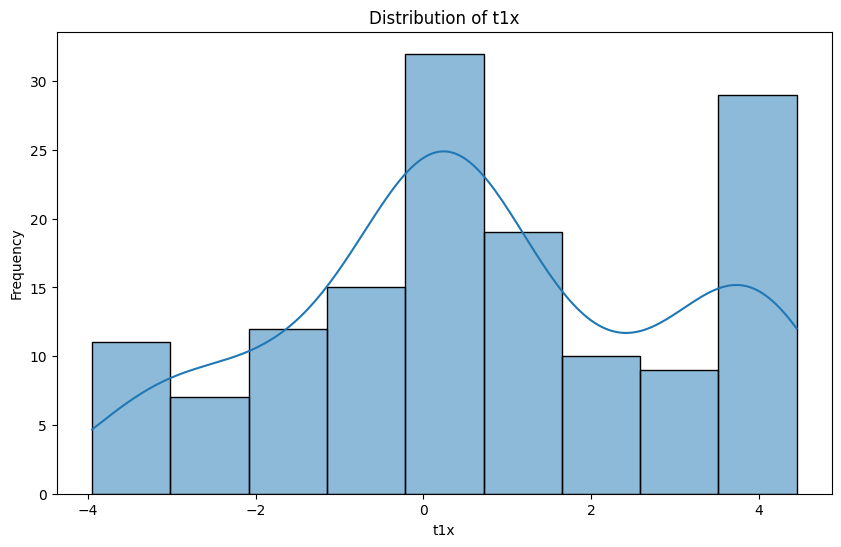


Analysis for column: t1i
Descriptive Statistics:
count    144.000000
mean       0.536111
std        2.218946
min       -4.250000
25%       -0.650000
50%        0.250000
75%        2.400000
max        4.250000
Name: t1i, dtype: float64


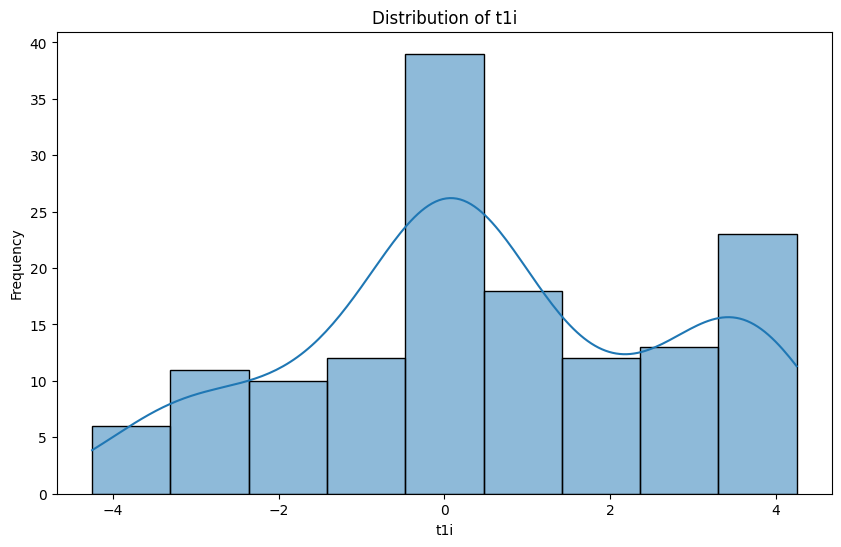


Analysis for column: b1a
Descriptive Statistics:
count     144.000000
mean     1011.097222
std         3.356070
min      1008.000000
25%      1009.000000
50%      1009.000000
75%      1014.000000
max      1018.000000
Name: b1a, dtype: float64


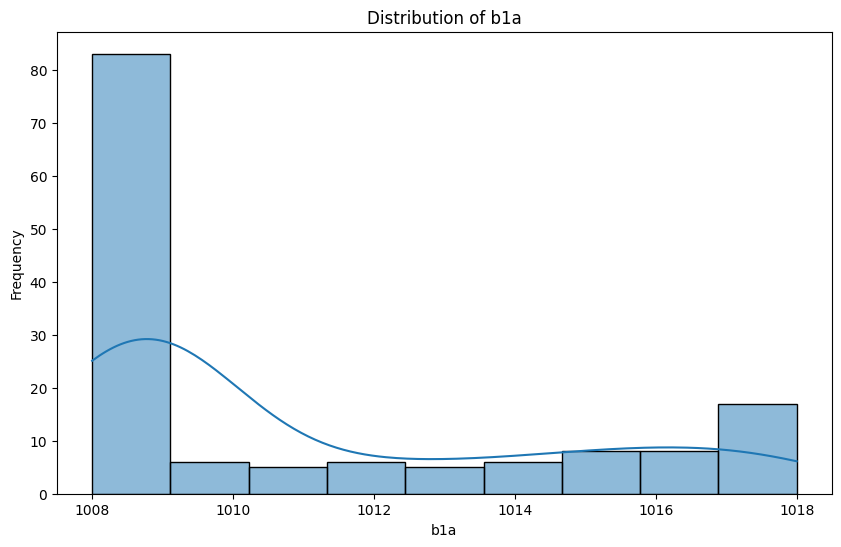


Analysis for column: b1x
Descriptive Statistics:
count     144.000000
mean     1011.437500
std         3.293814
min      1008.000000
25%      1009.000000
50%      1009.000000
75%      1014.000000
max      1018.000000
Name: b1x, dtype: float64


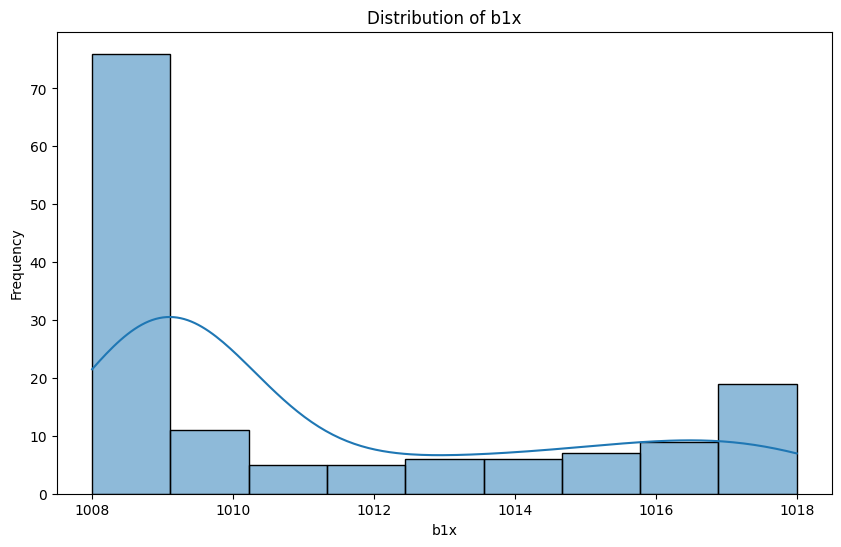


Analysis for column: b1i
Descriptive Statistics:
count     144.00000
mean     1010.68750
std         3.31445
min      1008.00000
25%      1008.00000
50%      1009.00000
75%      1013.25000
max      1018.00000
Name: b1i, dtype: float64


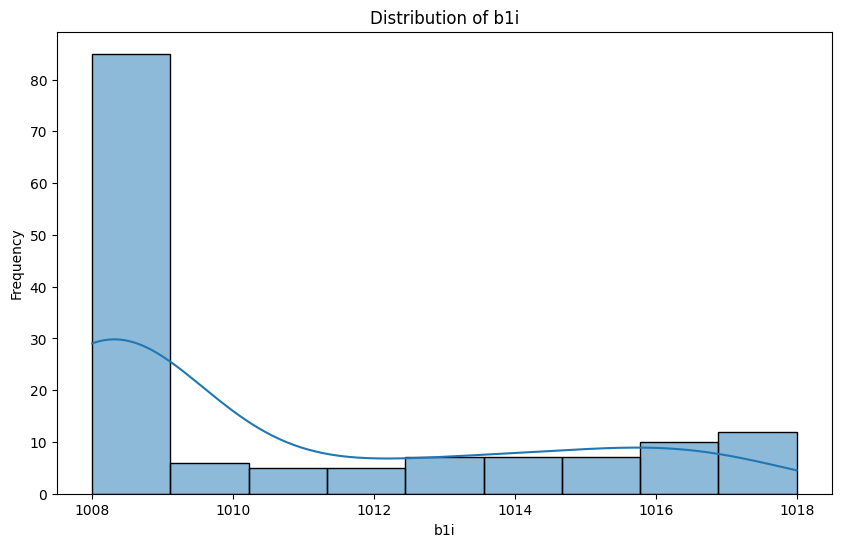


Analysis for column: p1a
Descriptive Statistics:
count    144.000000
mean       8.610147
std        2.001605
min        4.996400
25%        7.183450
50%        8.146300
75%        9.903500
max       15.651940
Name: p1a, dtype: float64


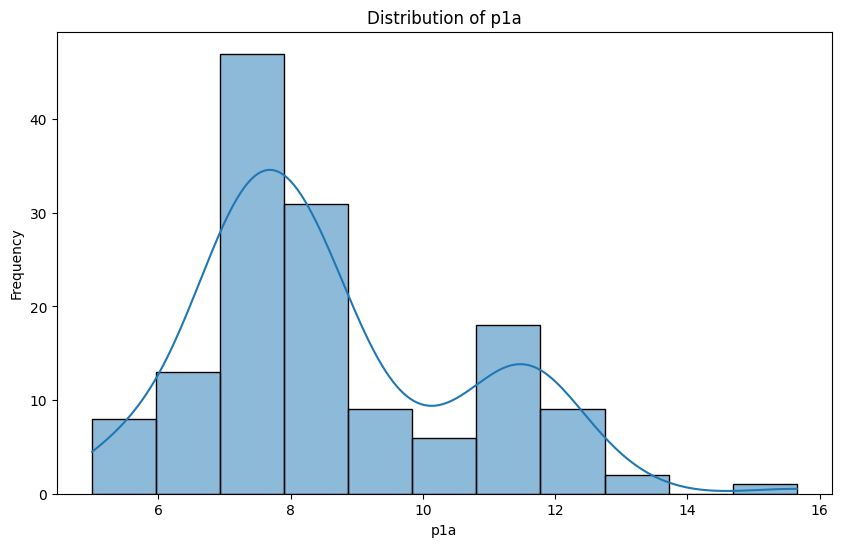


Analysis for column: p1x
Descriptive Statistics:
count    144.000000
mean      10.872842
std        2.779263
min        5.913400
25%        8.847800
50%       10.085750
75%       12.584575
max       19.255750
Name: p1x, dtype: float64


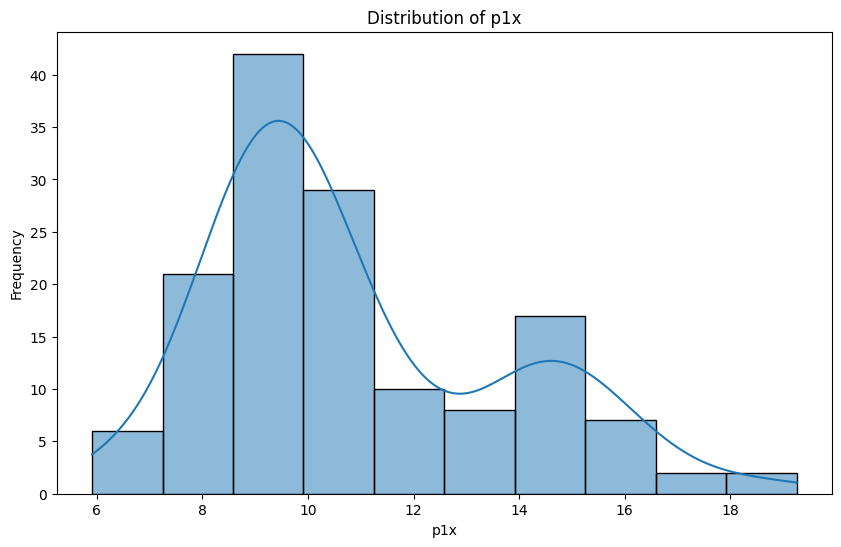


Analysis for column: p1i
Descriptive Statistics:
count    144.000000
mean       6.447043
std        1.371525
min        3.758450
25%        5.454900
50%        6.303125
75%        7.151350
max       11.598800
Name: p1i, dtype: float64


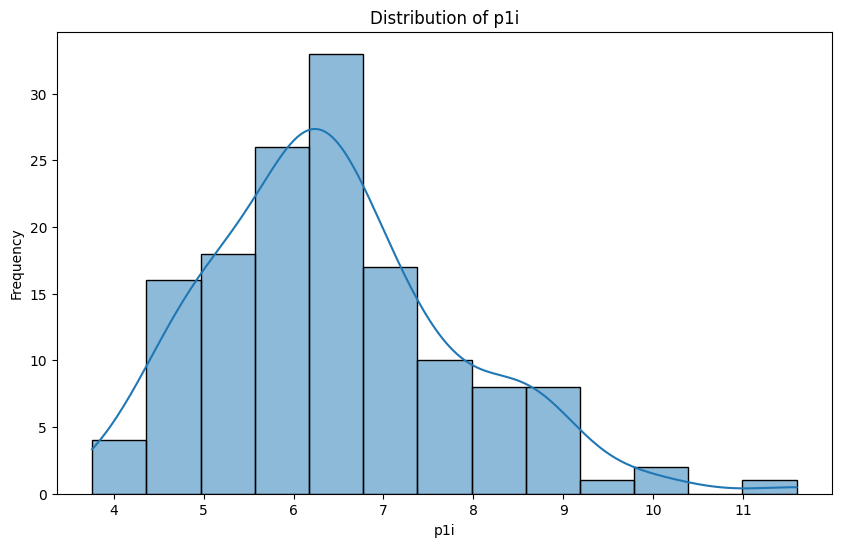


Analysis for column: p1s
Descriptive Statistics:
count    144.000000
mean       0.835396
std        0.367301
min        0.270520
25%        0.563960
50%        0.701505
75%        1.056843
max        1.980720
Name: p1s, dtype: float64


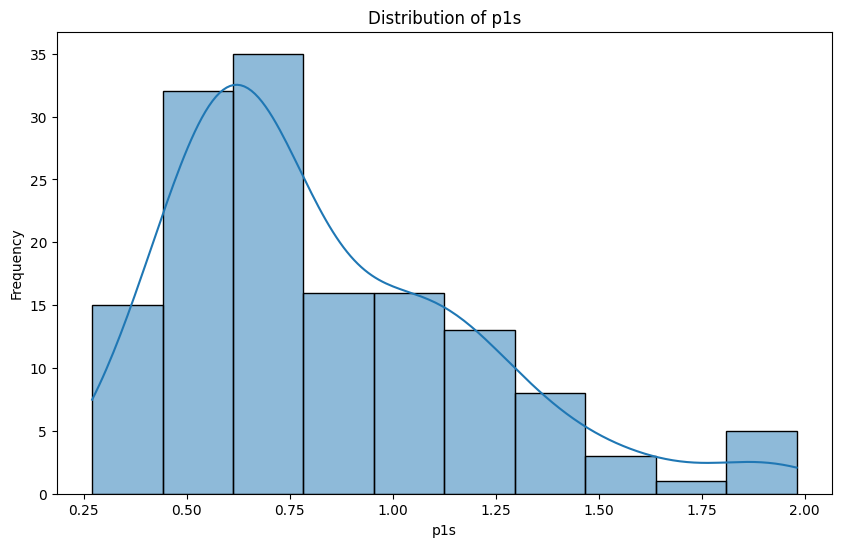


Analysis for column: tia
Descriptive Statistics:
count    144.000000
mean      41.583333
std        3.465111
min       37.000000
25%       39.000000
50%       40.000000
75%       45.000000
max       48.000000
Name: tia, dtype: float64


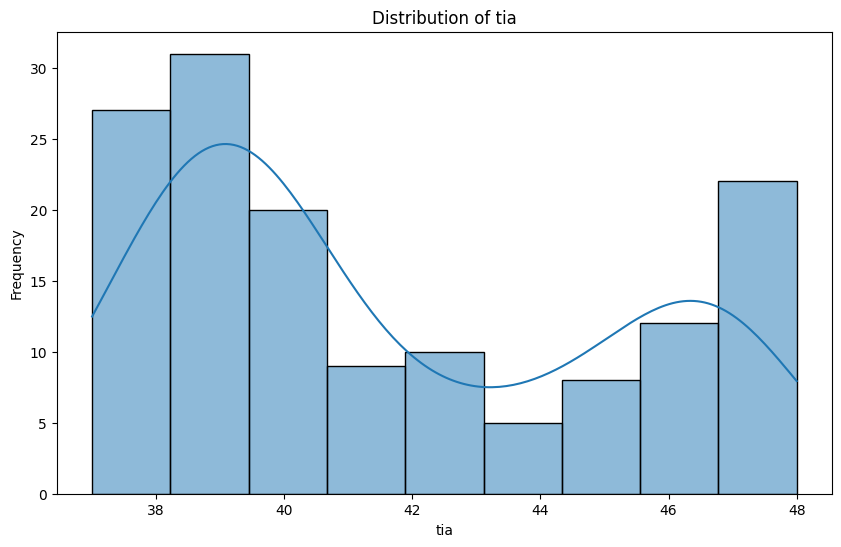


Analysis for column: tix
Descriptive Statistics:
count    144.000000
mean      41.652778
std        3.470796
min       37.000000
25%       39.000000
50%       40.000000
75%       45.000000
max       48.000000
Name: tix, dtype: float64


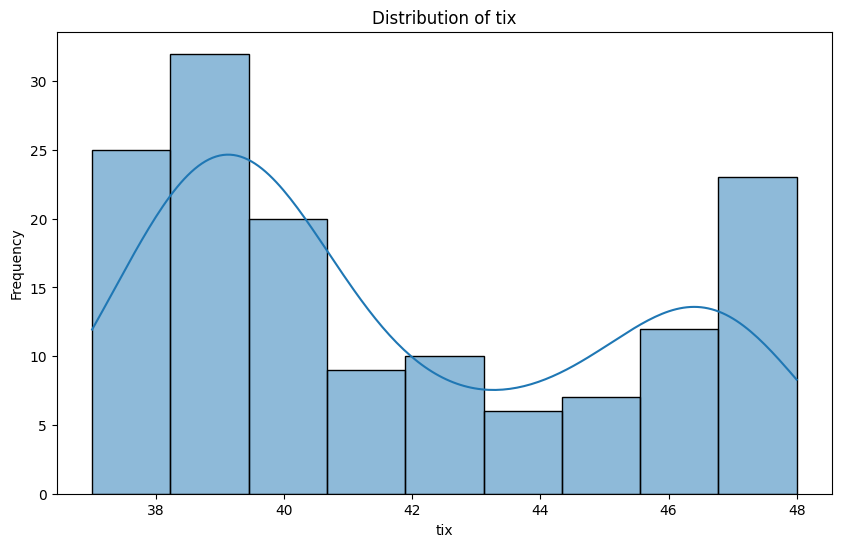


Analysis for column: tii
Descriptive Statistics:
count    144.000000
mean      41.486111
std        3.419373
min       37.000000
25%       39.000000
50%       40.000000
75%       45.000000
max       47.000000
Name: tii, dtype: float64


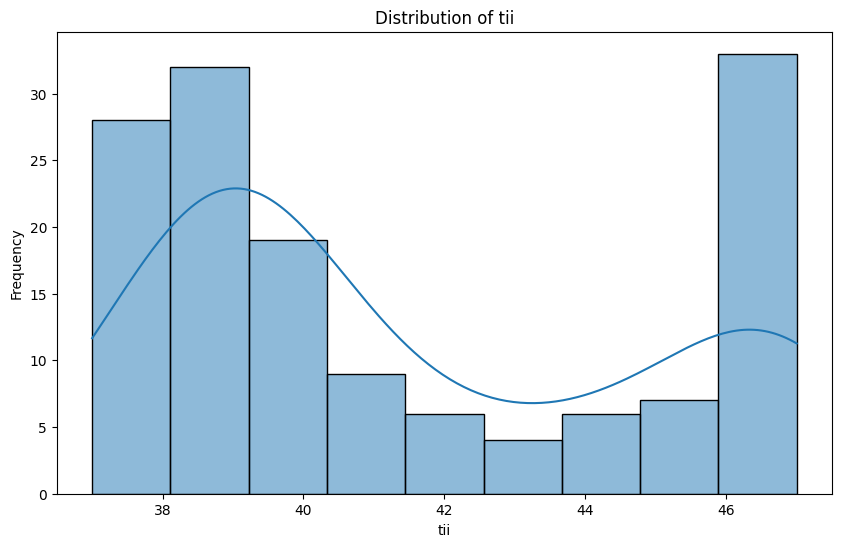


Analysis for column: vxa
Descriptive Statistics:
count    144.000000
mean     130.597222
std        5.930034
min      124.000000
25%      126.000000
50%      127.000000
75%      138.000000
max      140.000000
Name: vxa, dtype: float64


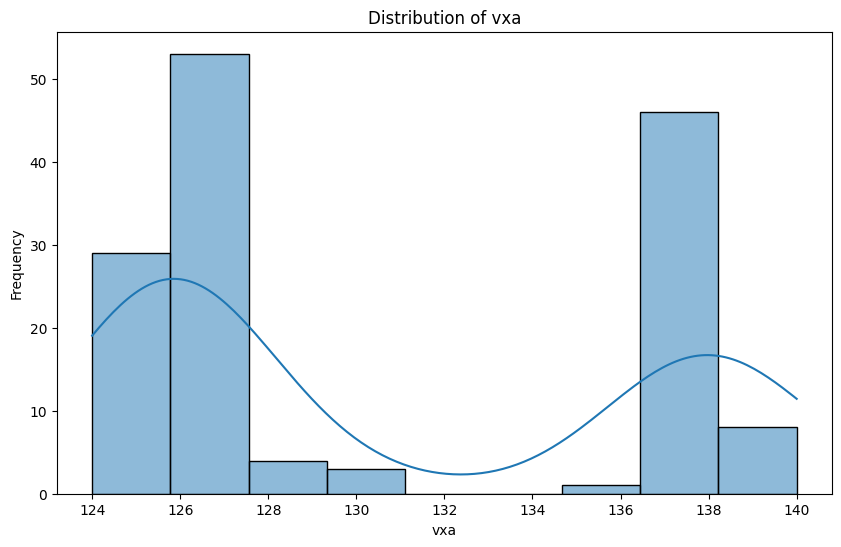


Analysis for column: vxx
Descriptive Statistics:
count    144.000000
mean     131.027778
std        6.261152
min      125.000000
25%      126.000000
50%      127.000000
75%      138.000000
max      141.000000
Name: vxx, dtype: float64


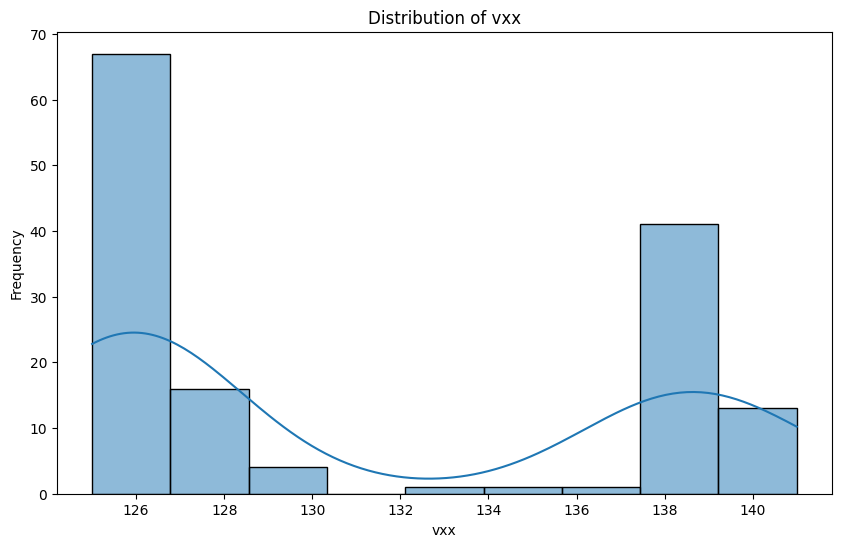


Analysis for column: vxi
Descriptive Statistics:
count    144.000000
mean     130.201389
std        5.607911
min      124.000000
25%      126.000000
50%      127.000000
75%      137.000000
max      139.000000
Name: vxi, dtype: float64


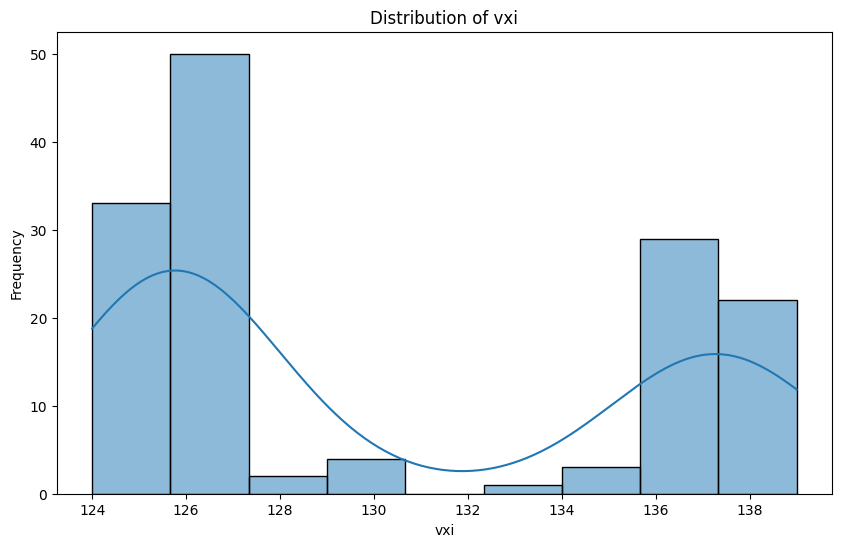


Analysis for column: bla
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bla, dtype: float64


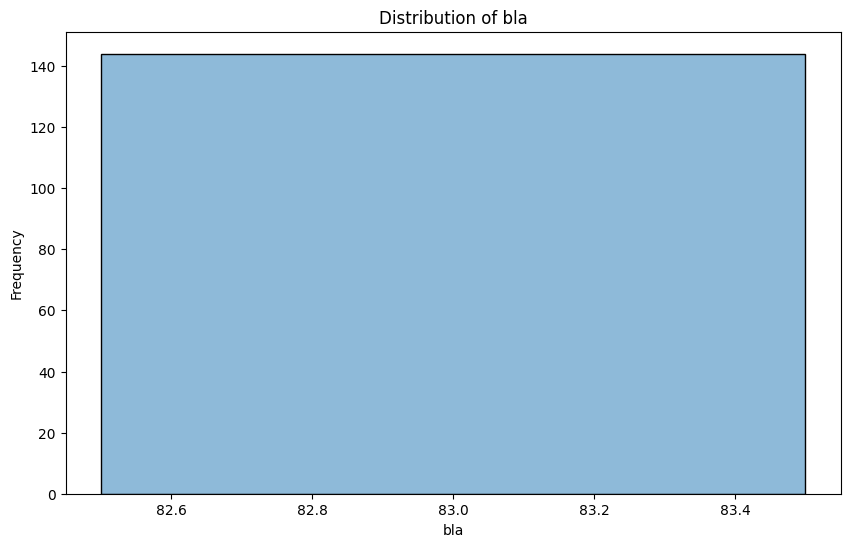


Analysis for column: blx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: blx, dtype: float64


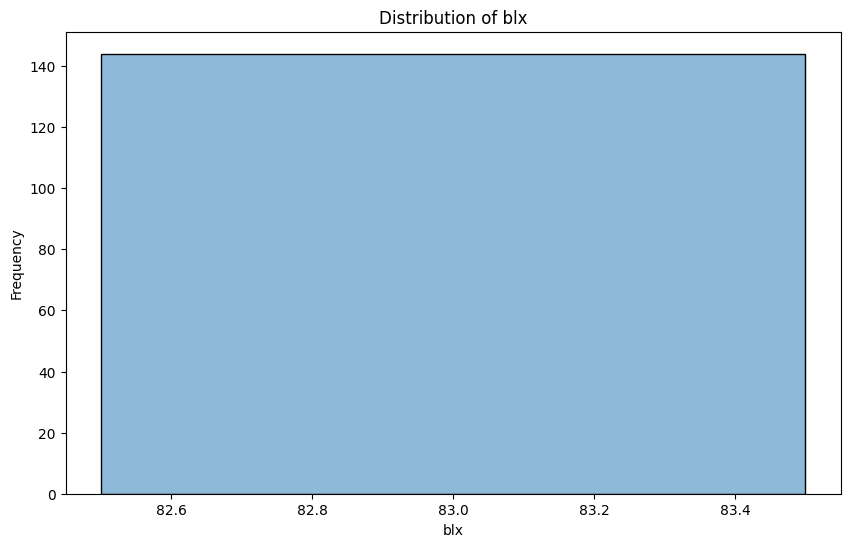


Analysis for column: bli
Descriptive Statistics:
count    144.000000
mean      82.993056
std        0.083333
min       82.000000
25%       83.000000
50%       83.000000
75%       83.000000
max       83.000000
Name: bli, dtype: float64


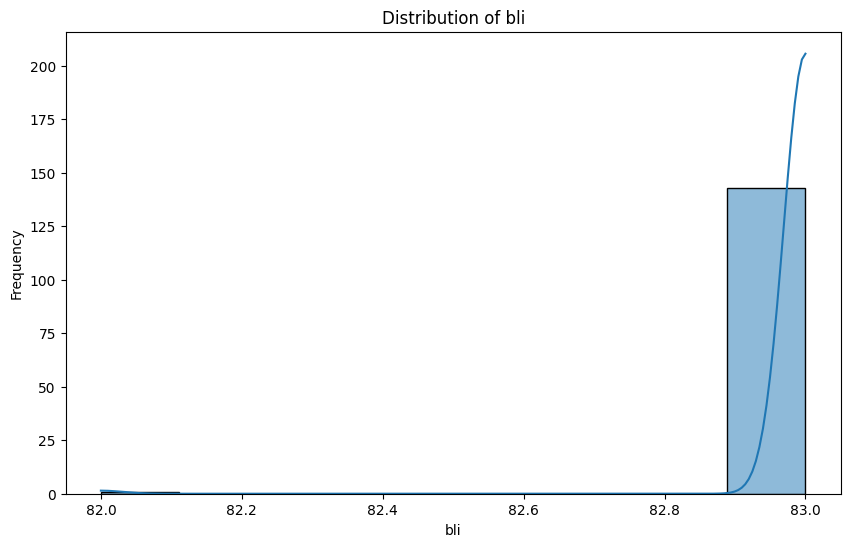


Analysis for column: bra
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bra, dtype: float64


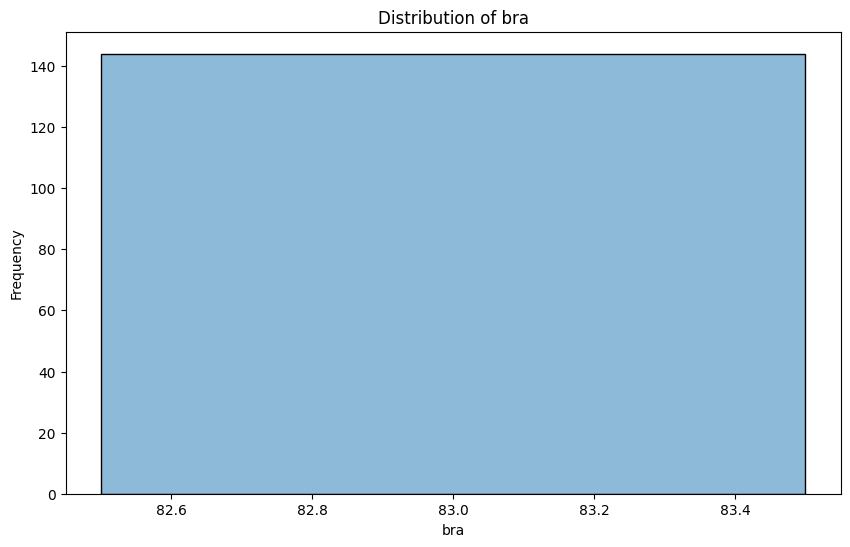


Analysis for column: brx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: brx, dtype: float64


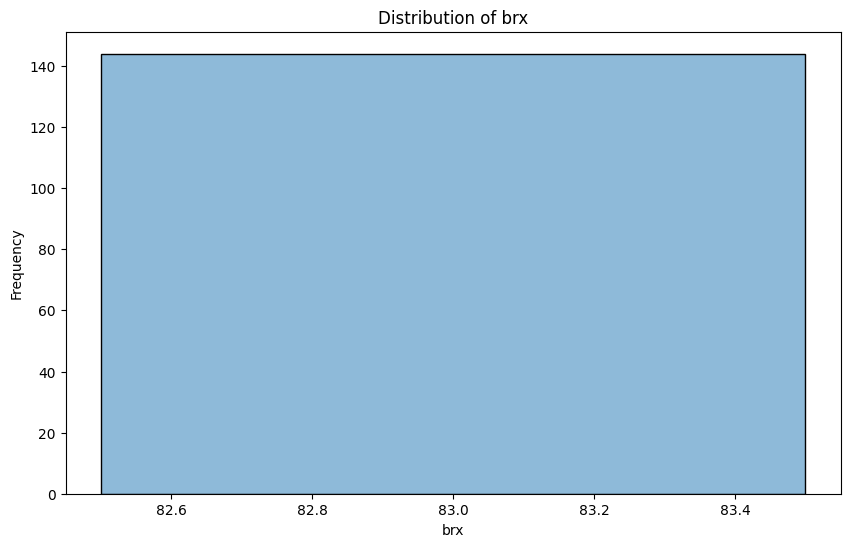


Analysis for column: bri
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bri, dtype: float64


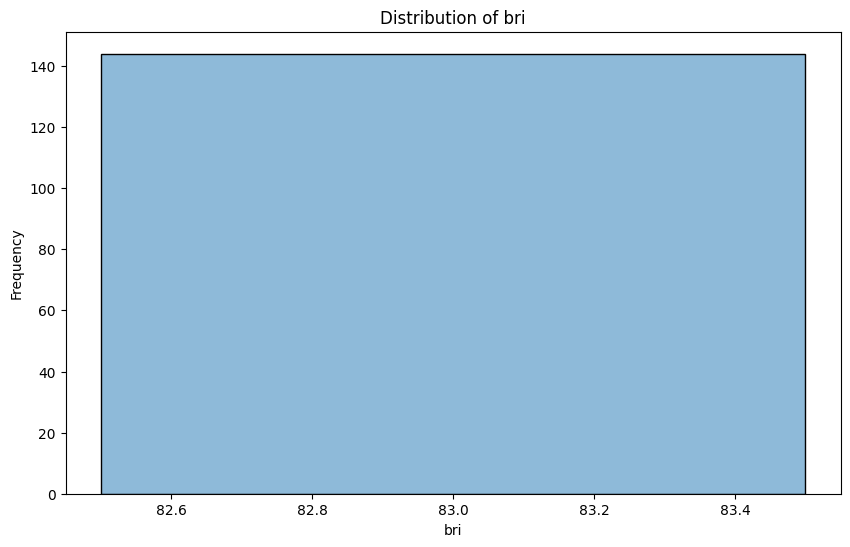

In [15]:
# Perform Statistical data analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        print("\nAnalysis for column:", column)
        
        # Descriptive statistics
        print("Descriptive Statistics:")
        print(df[column].describe())
        
        # Data visualization
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()  

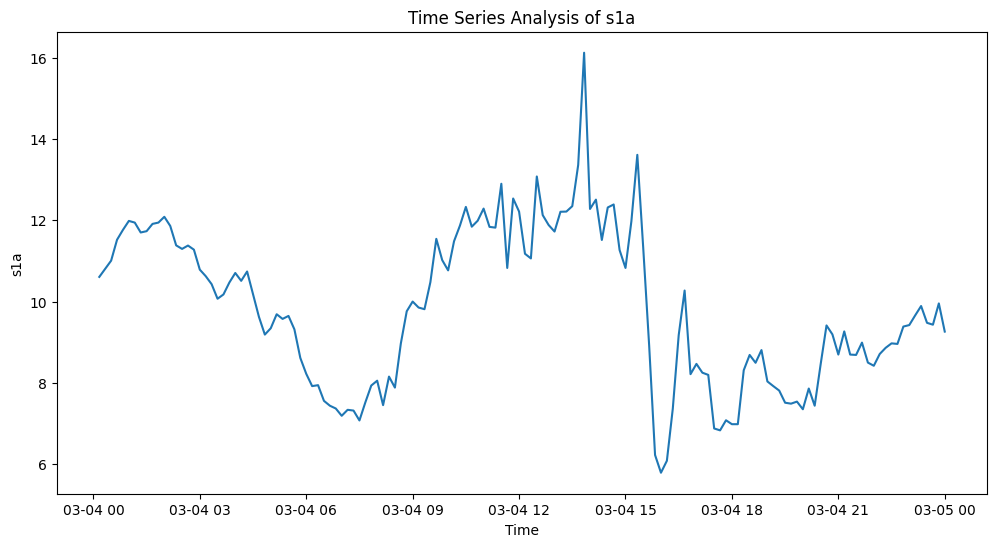

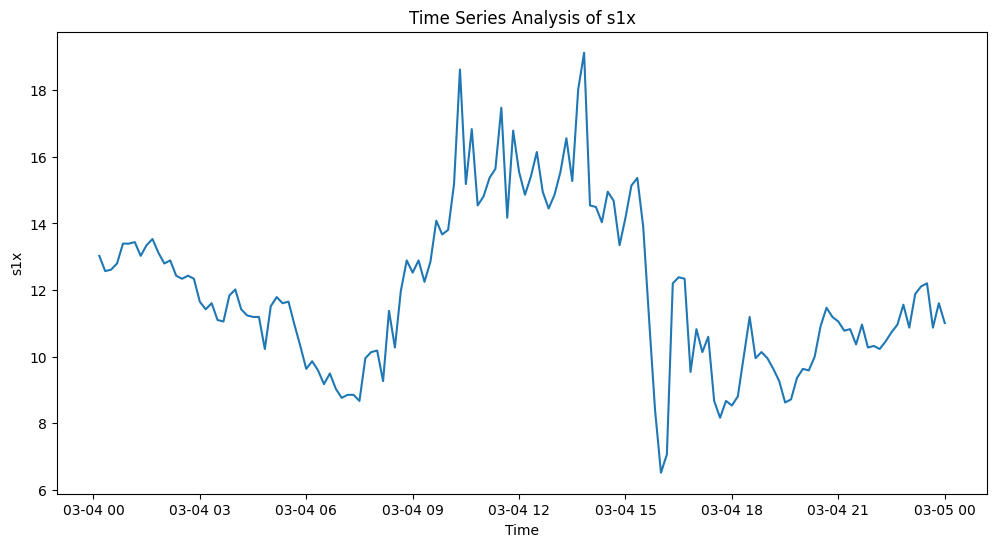

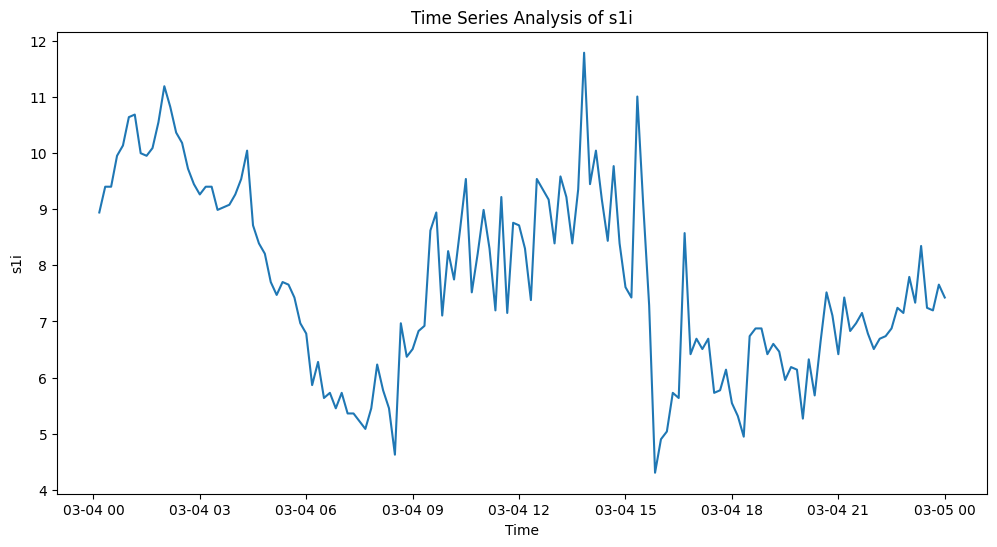

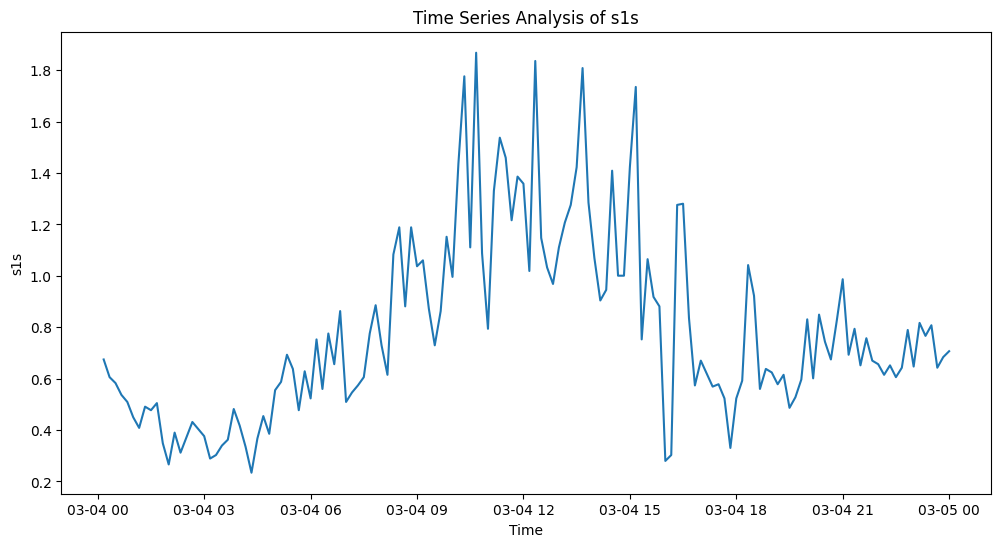

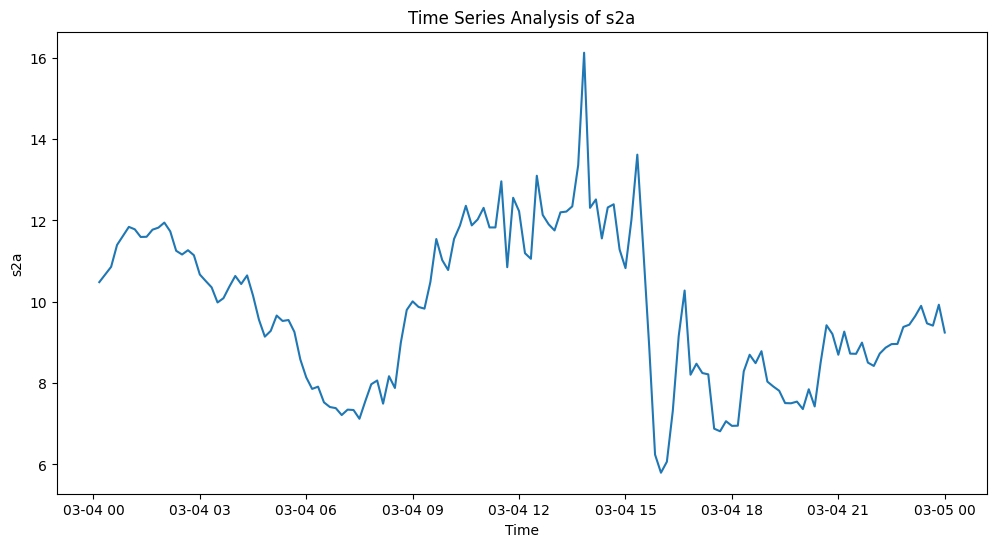

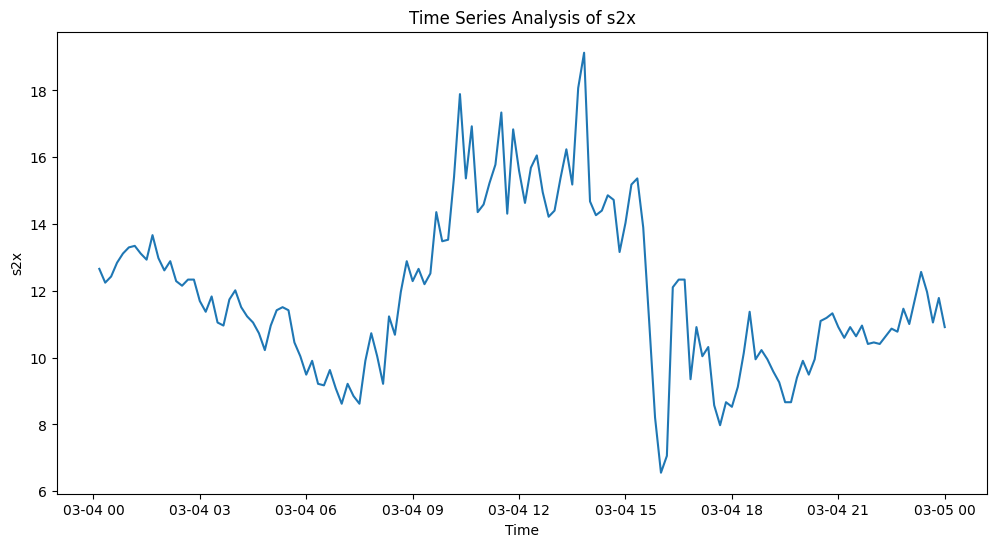

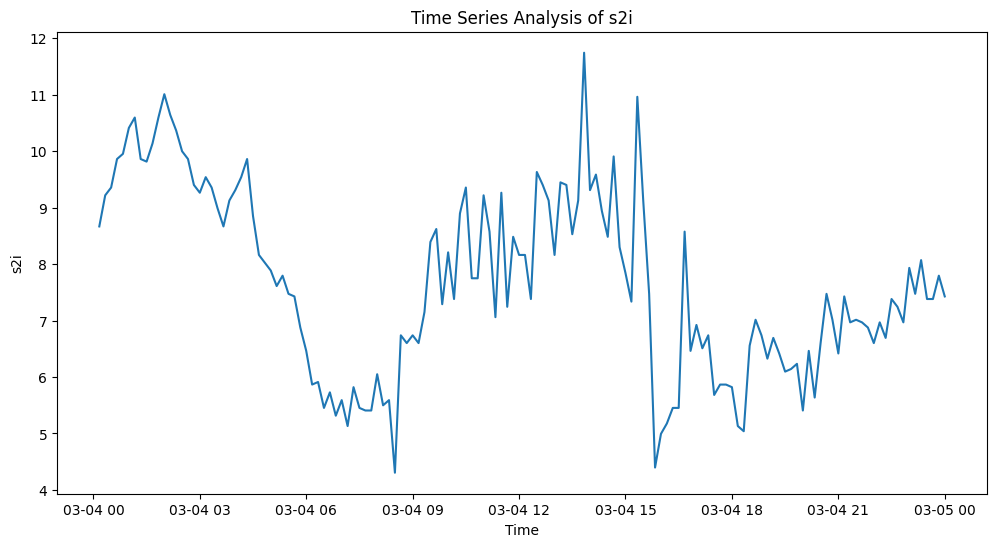

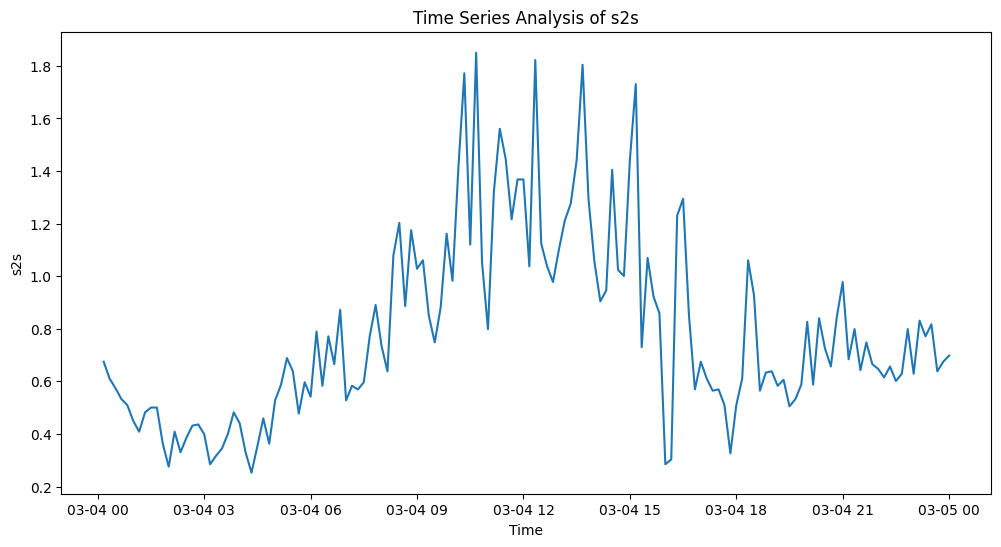

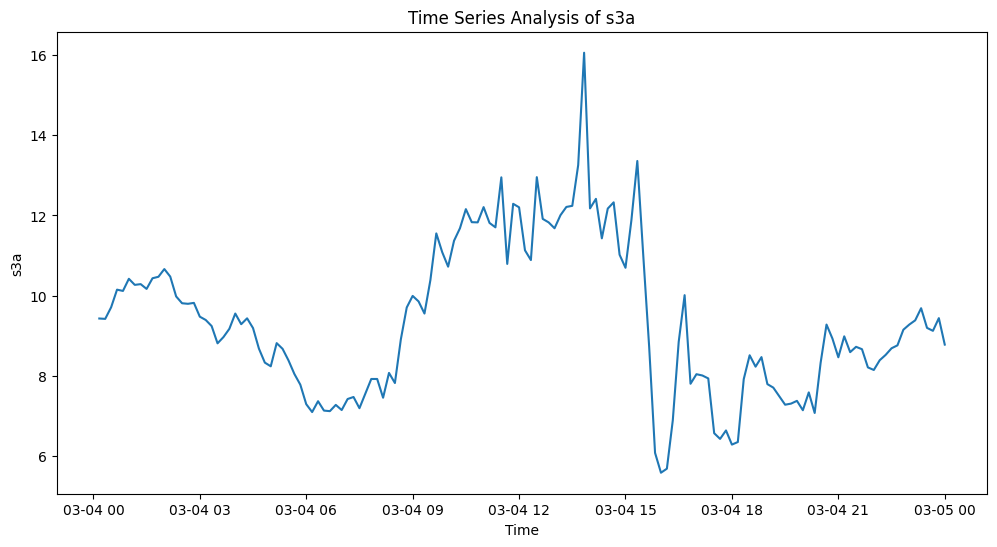

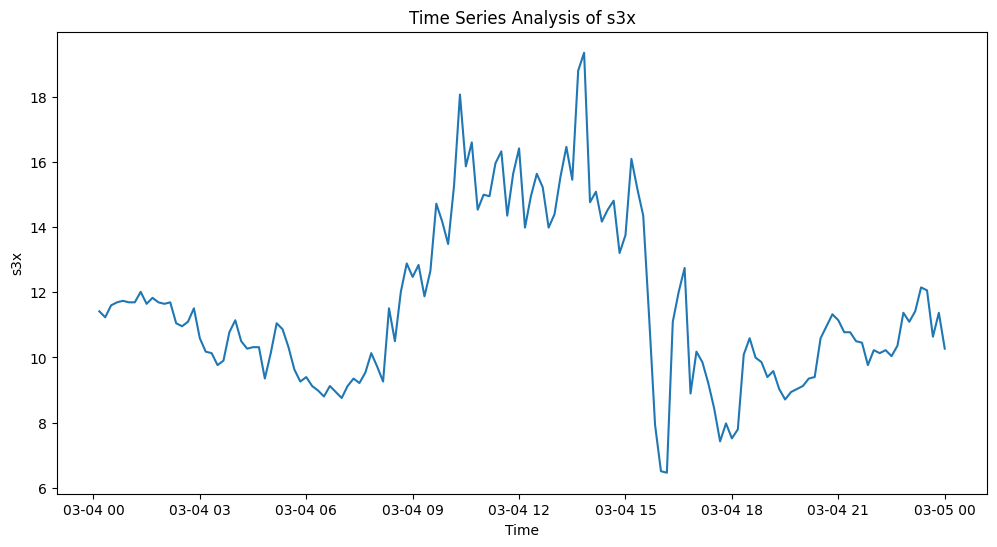

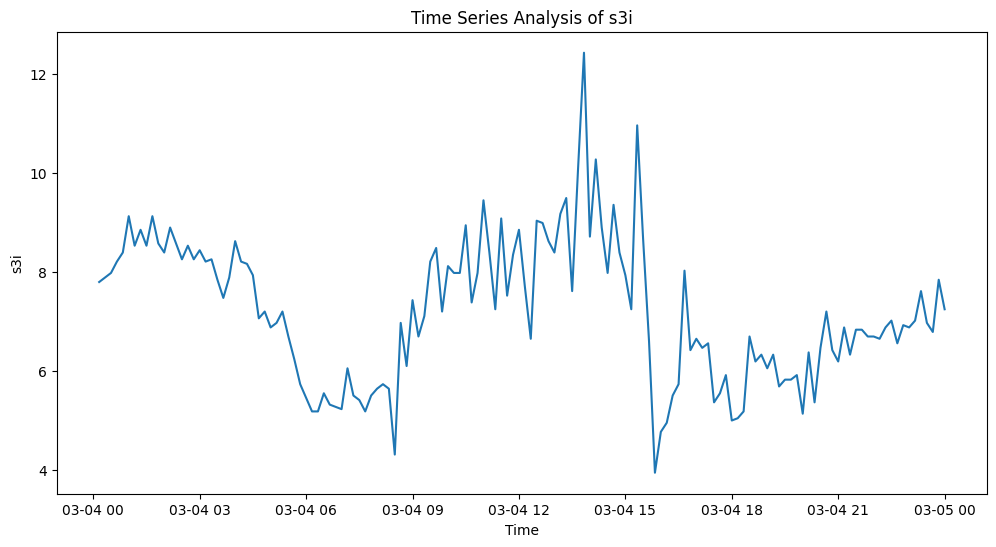

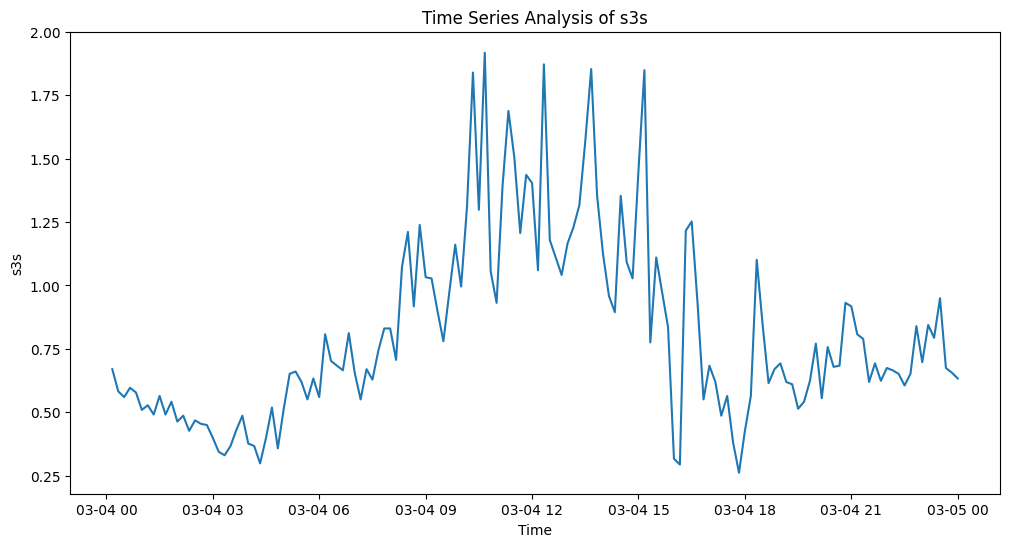

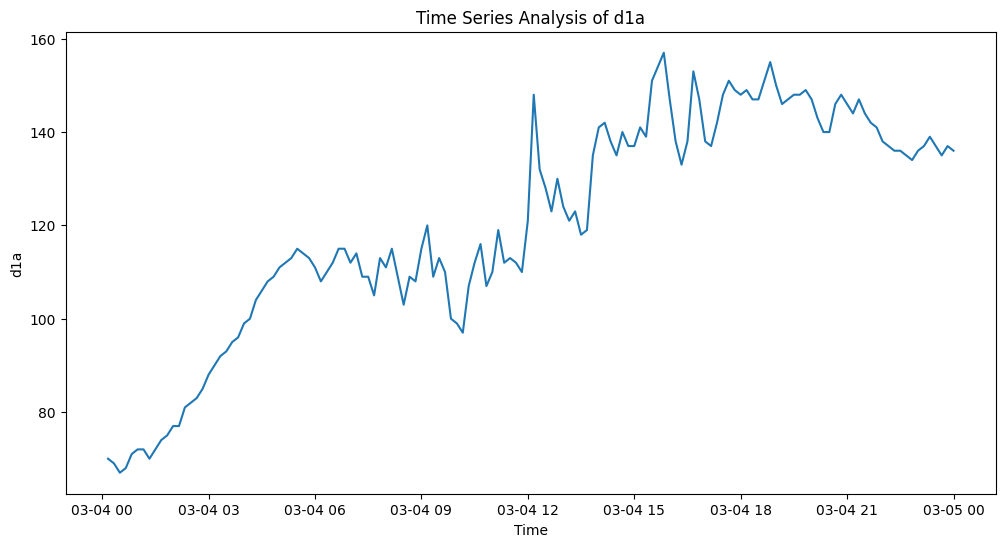

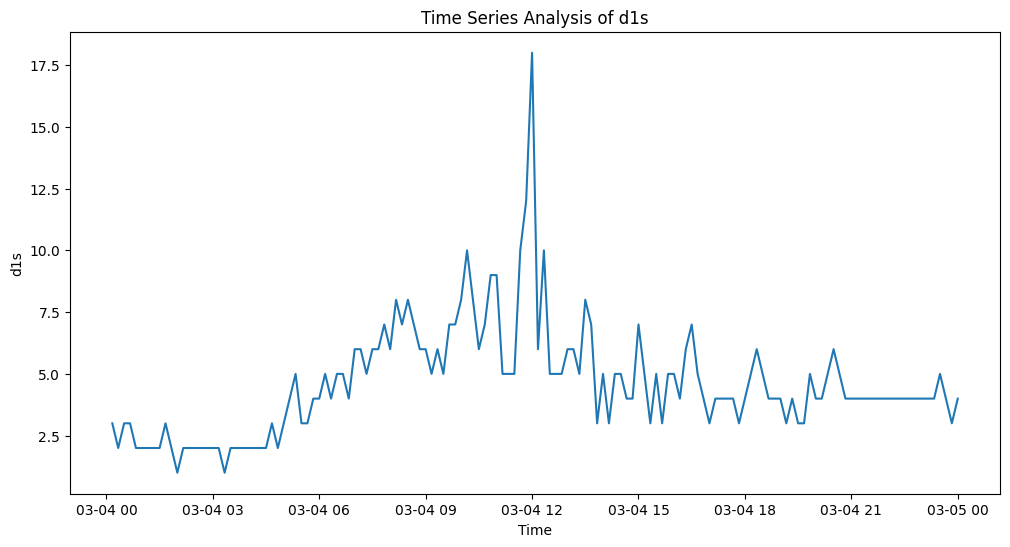

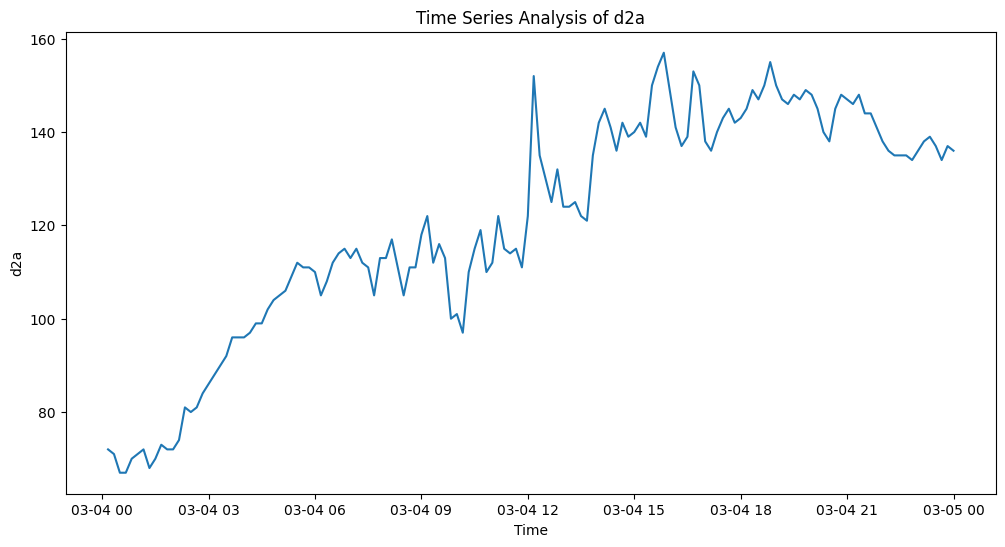

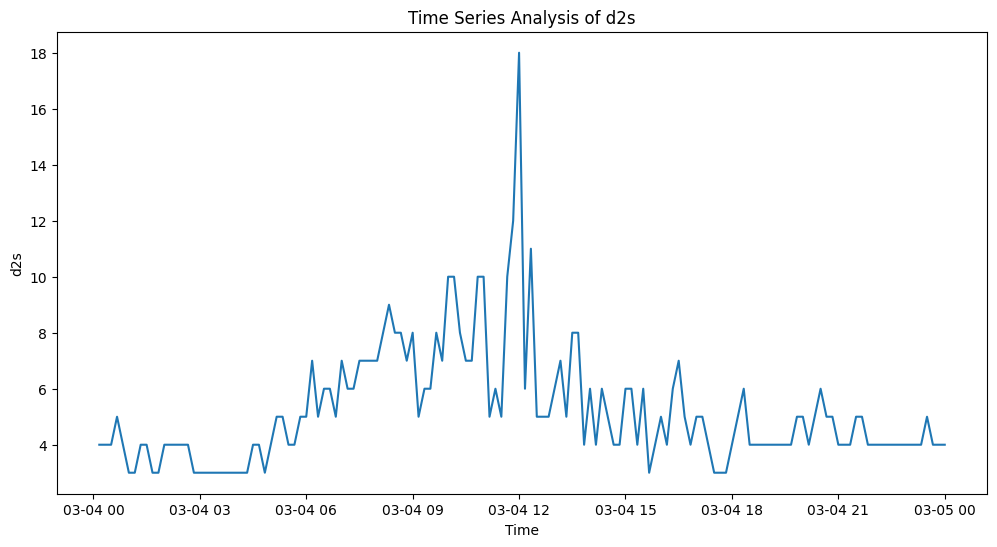

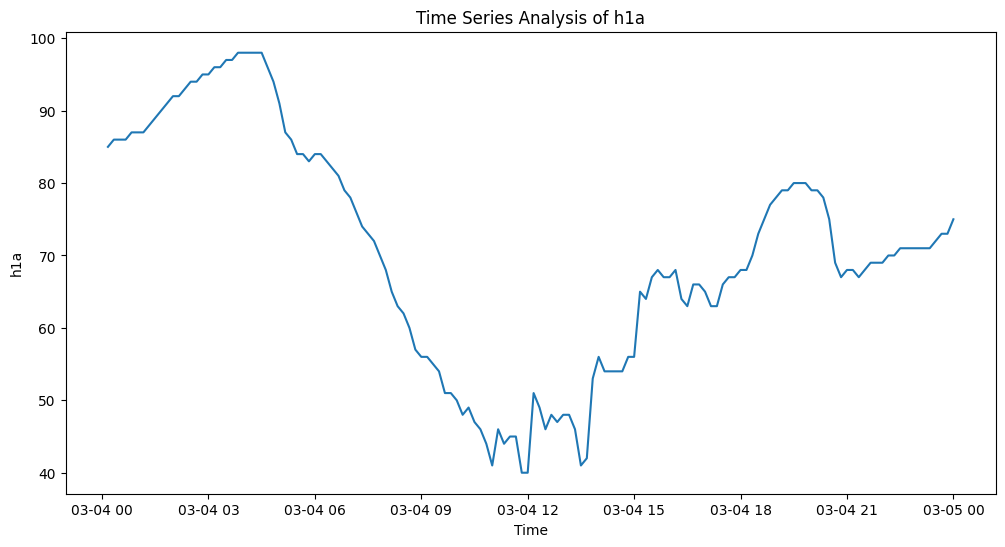

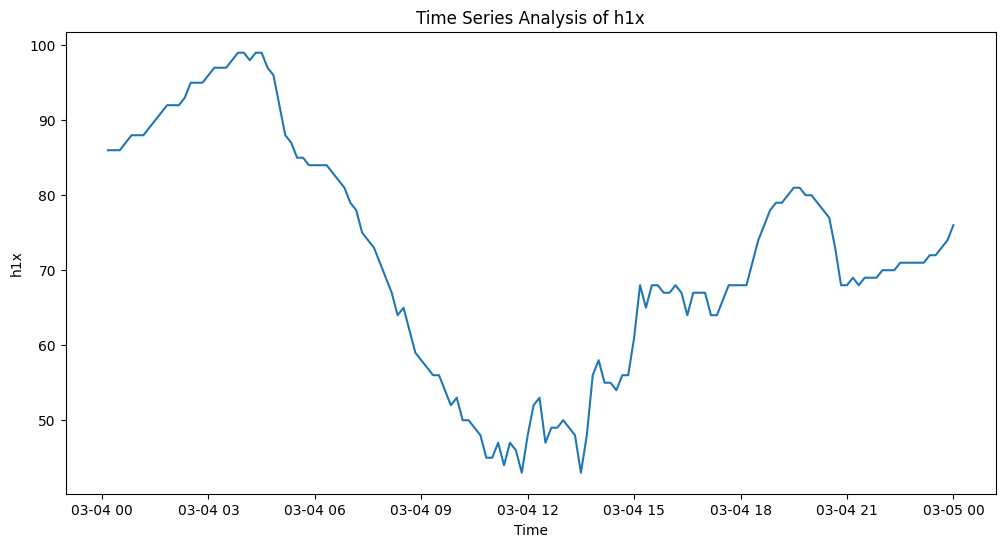

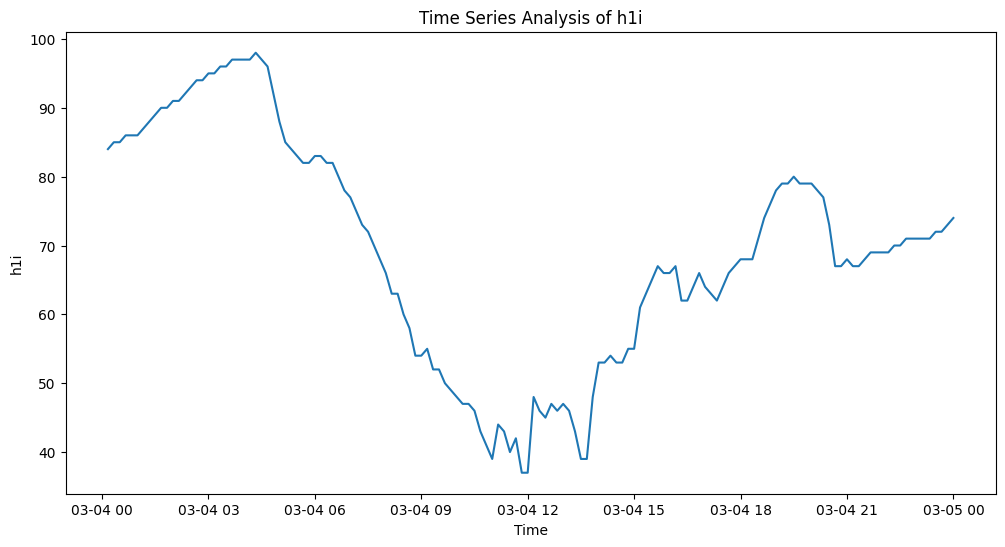

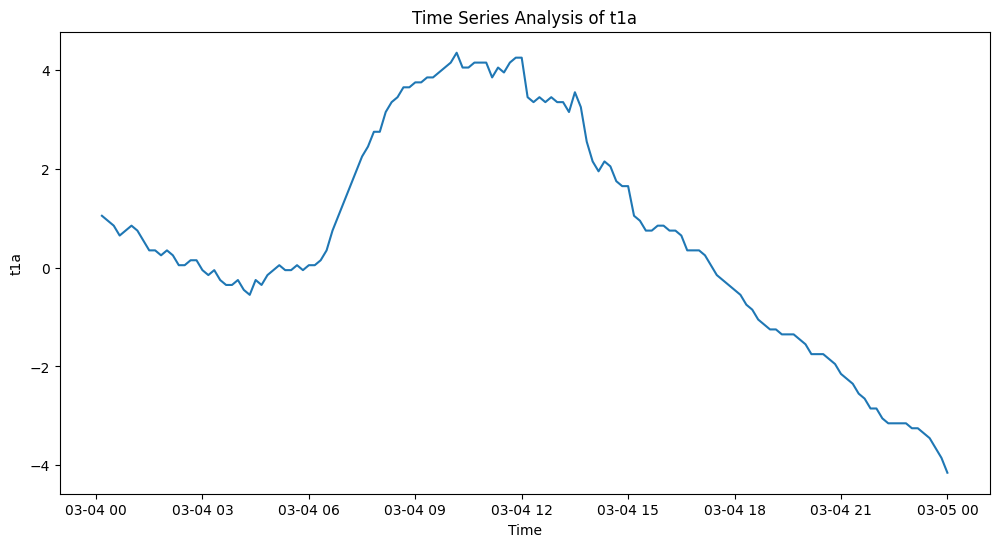

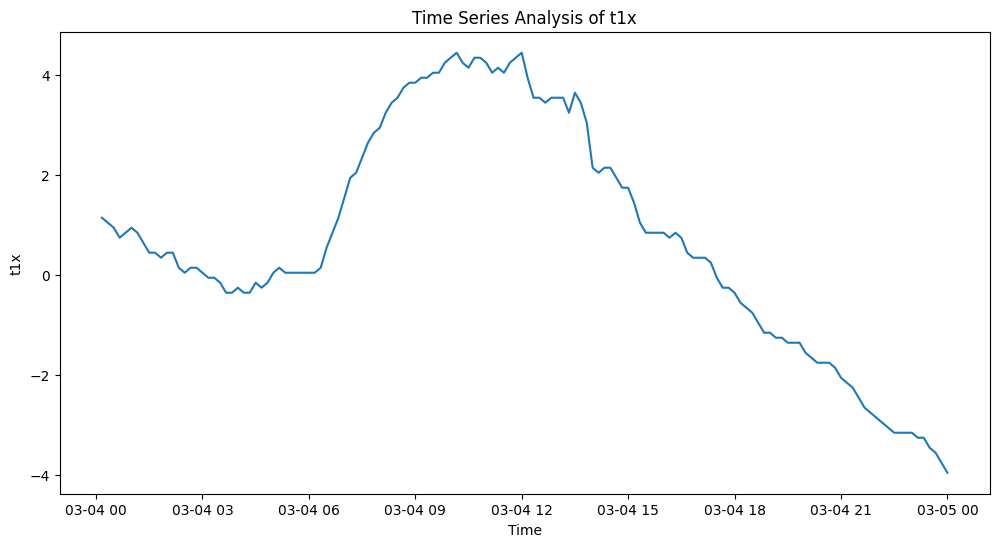

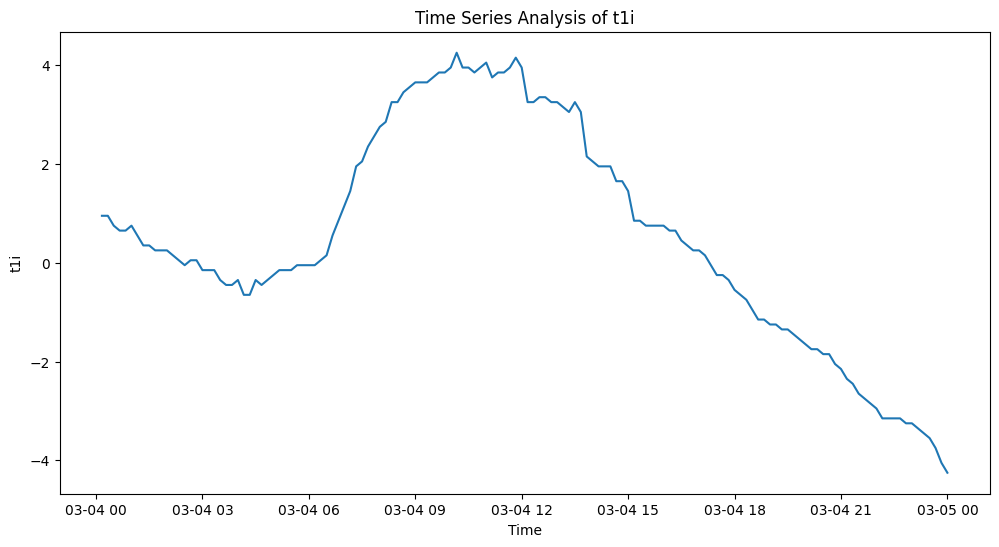

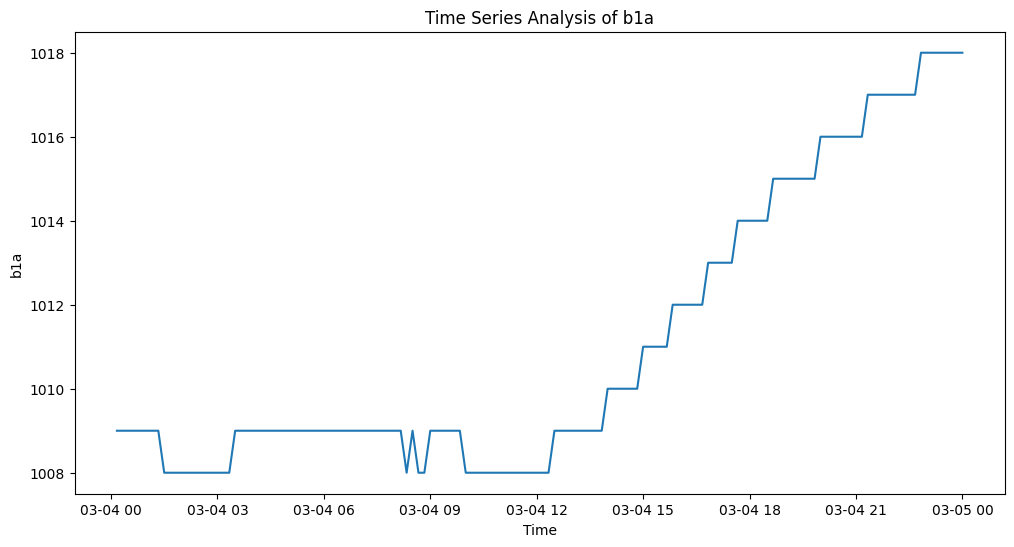

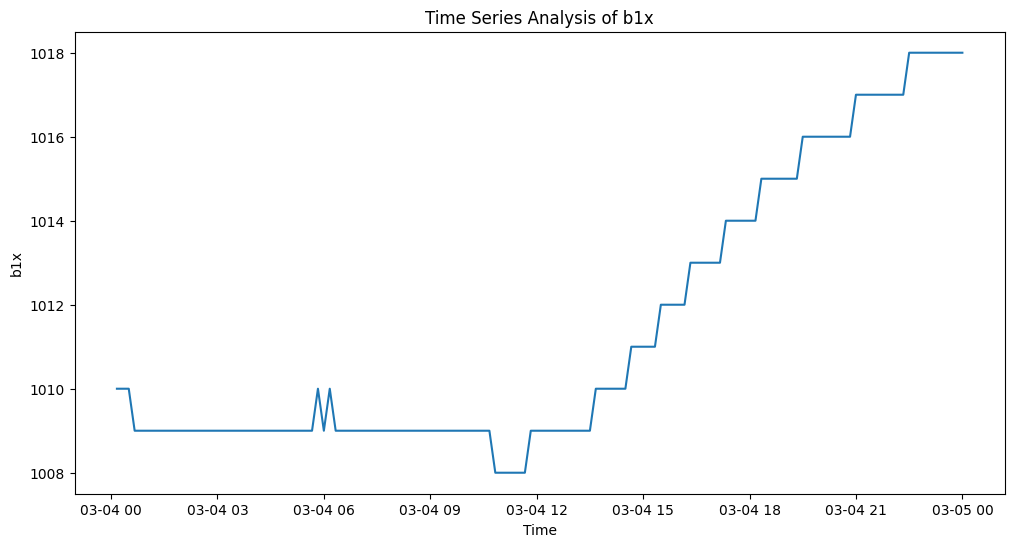

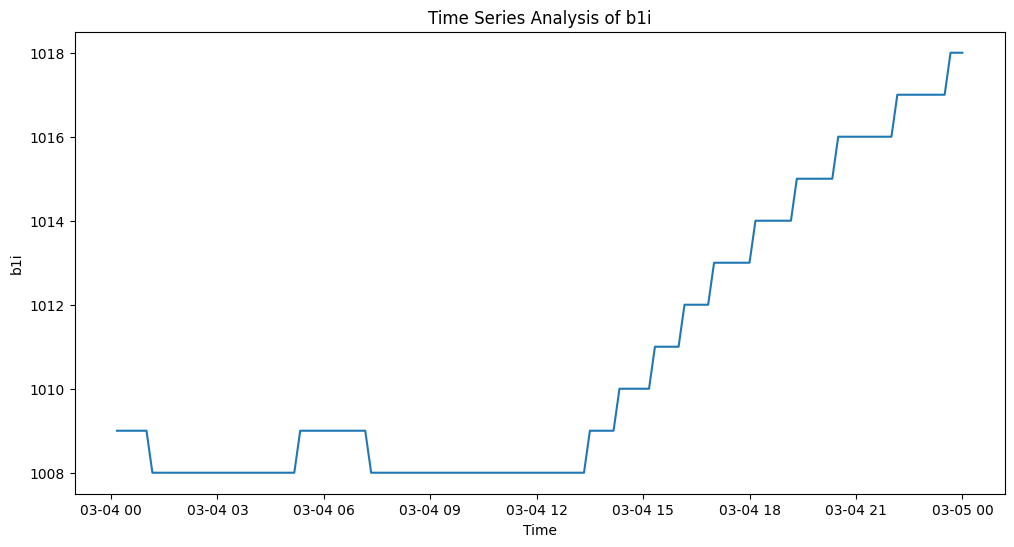

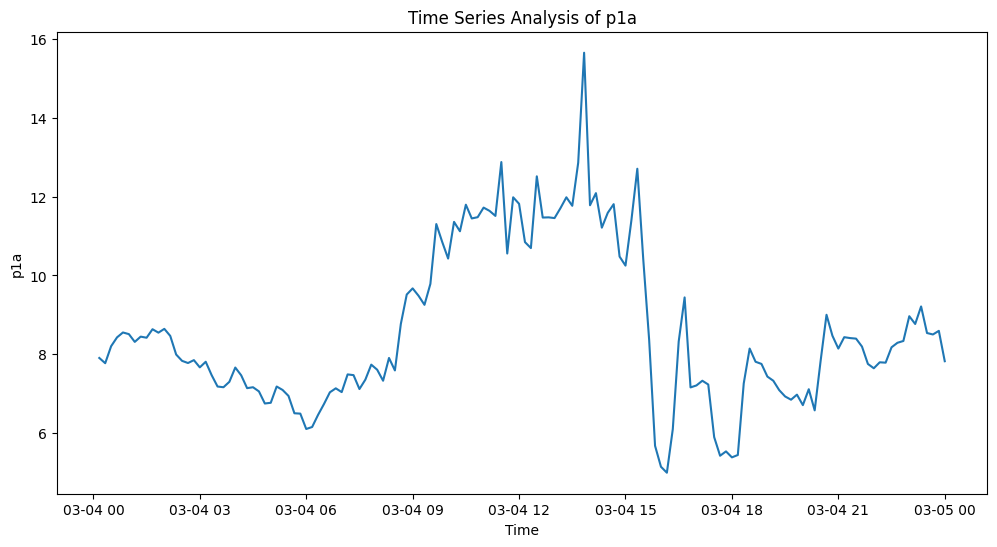

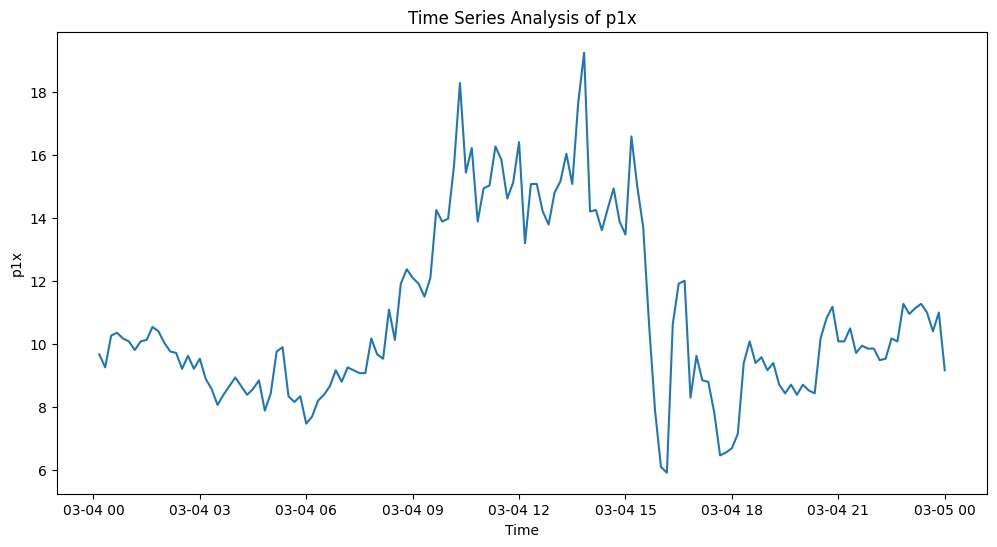

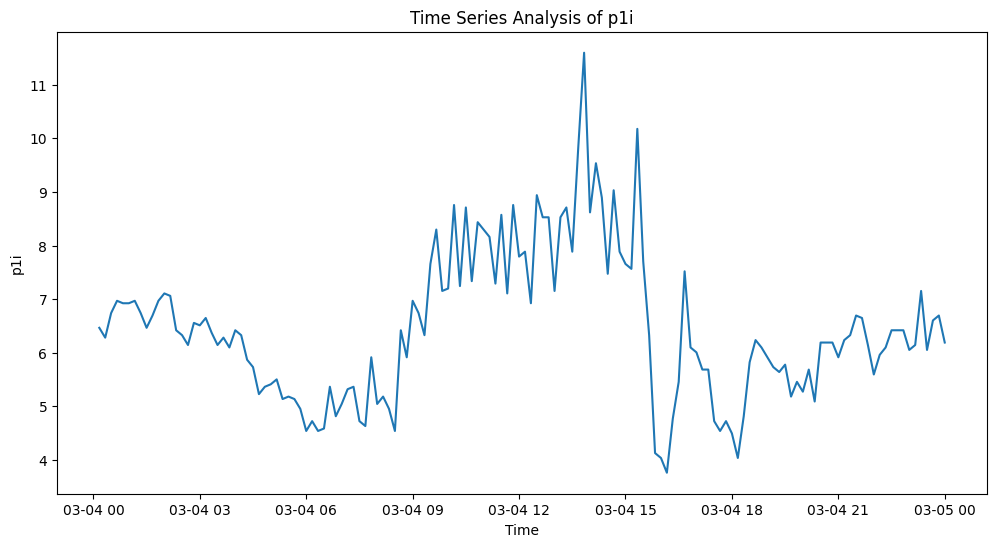

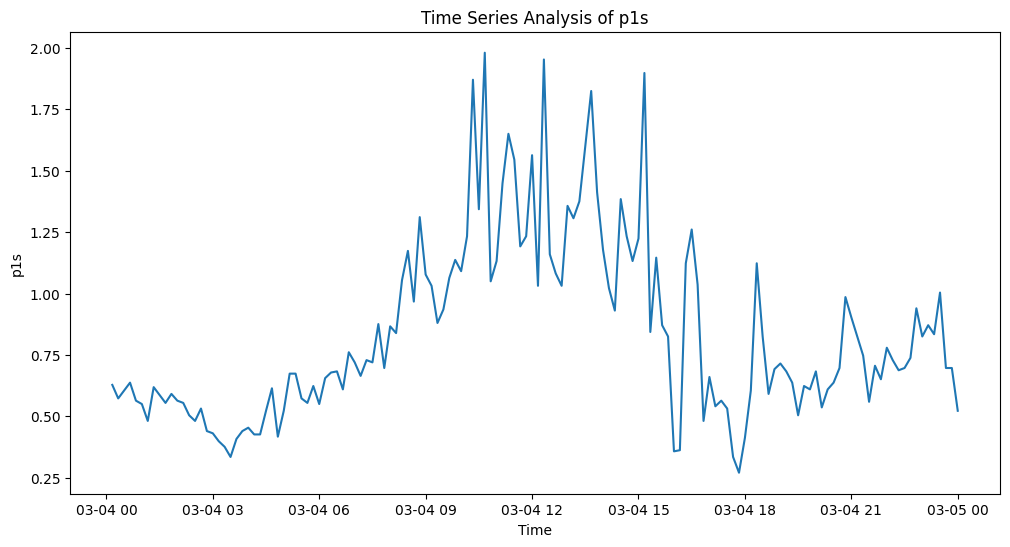

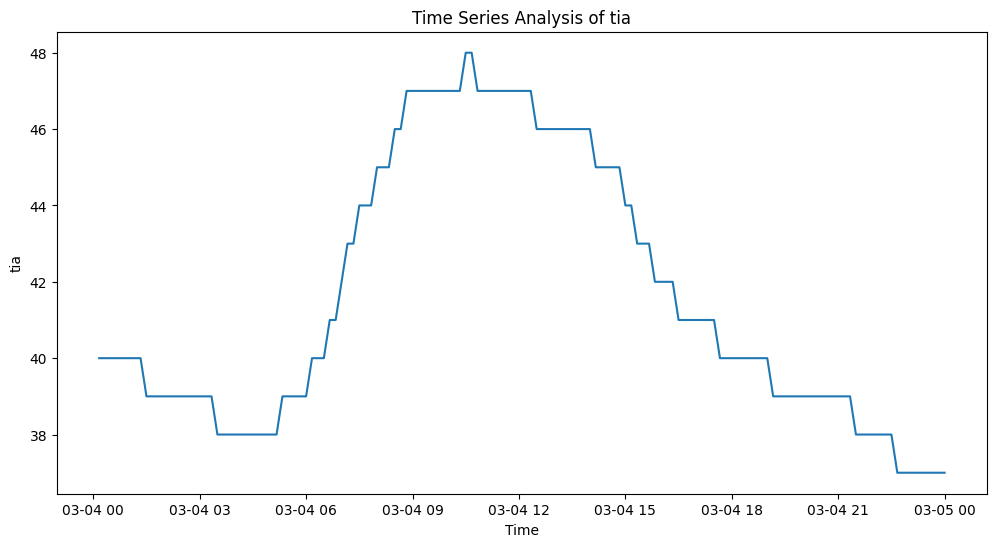

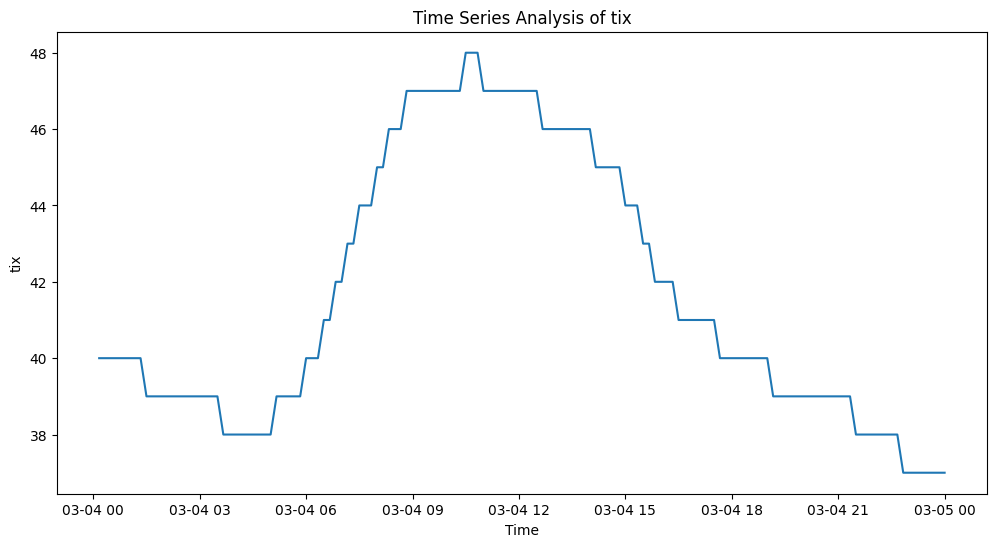

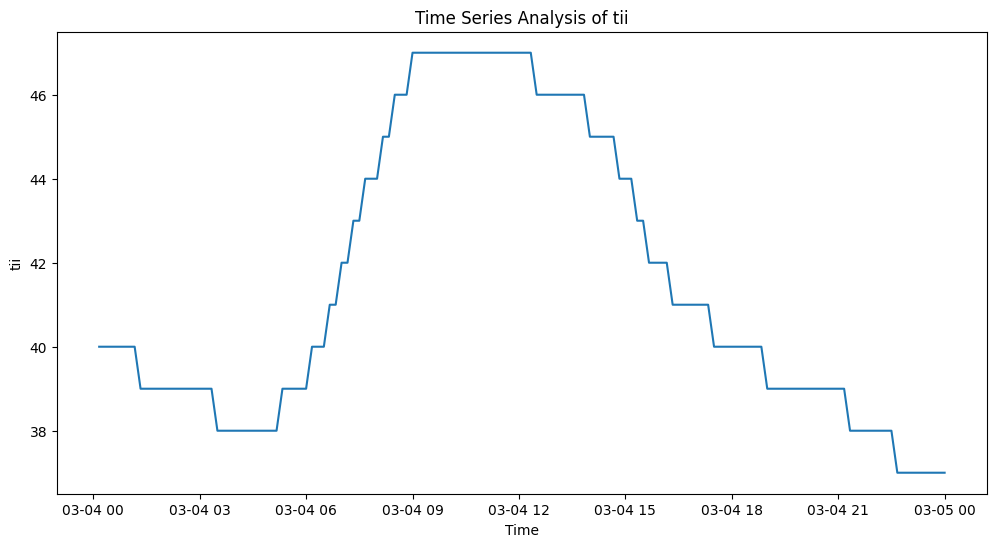

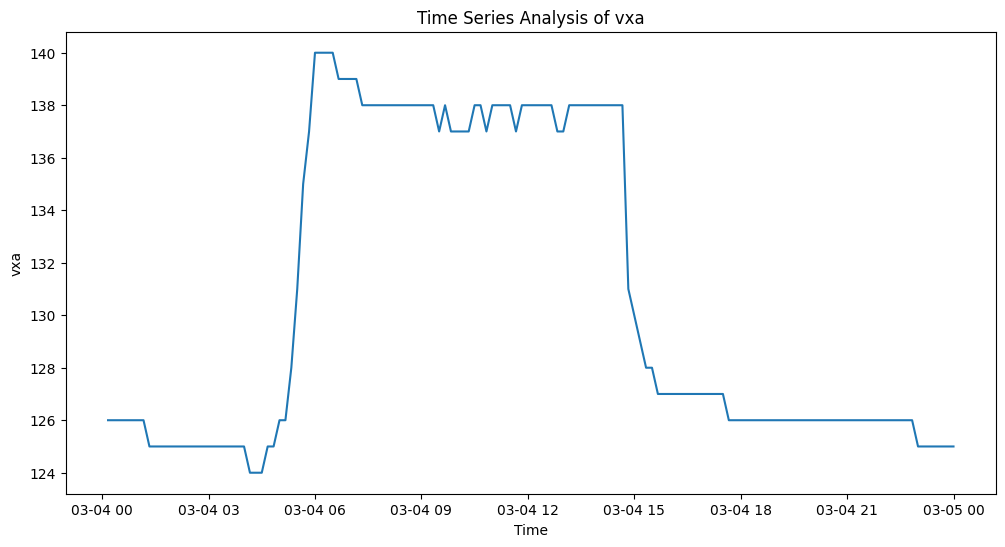

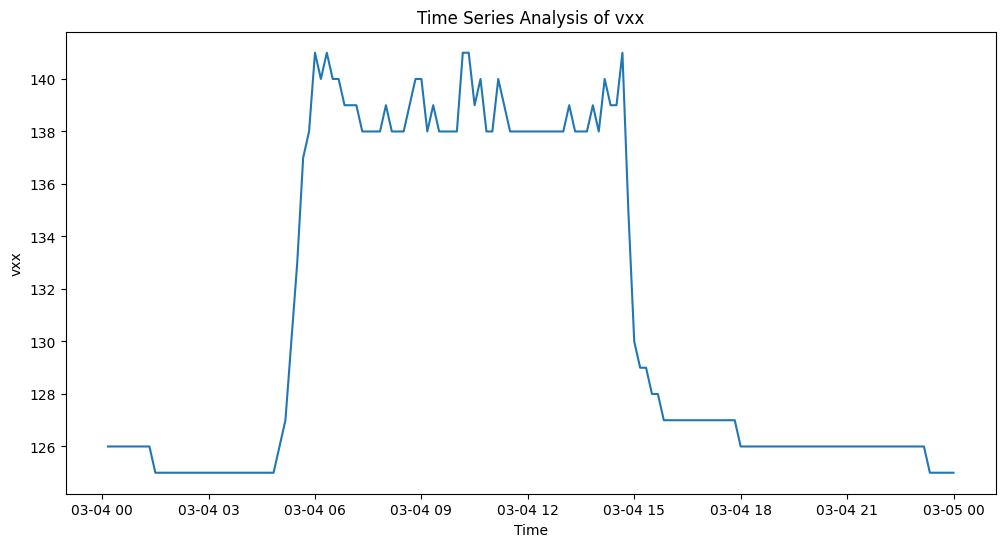

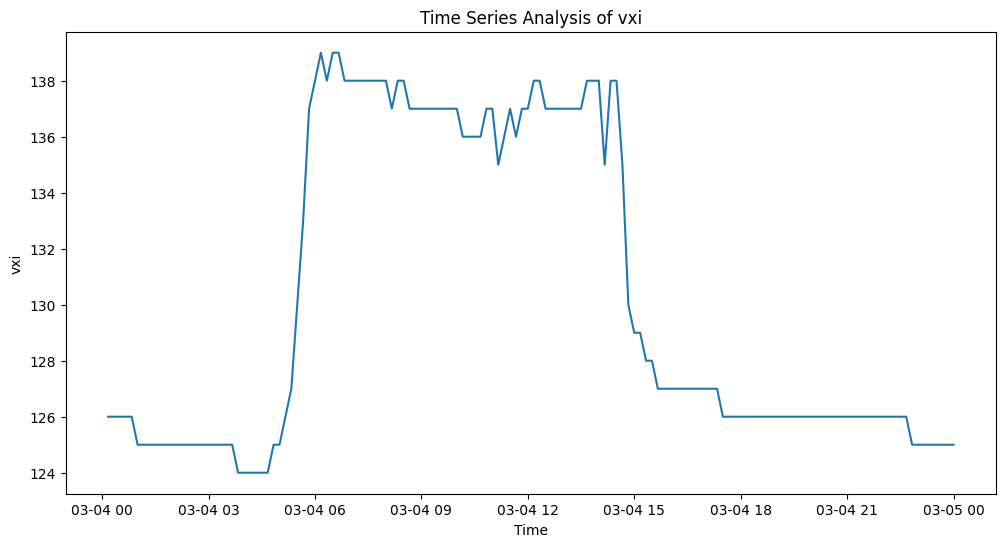

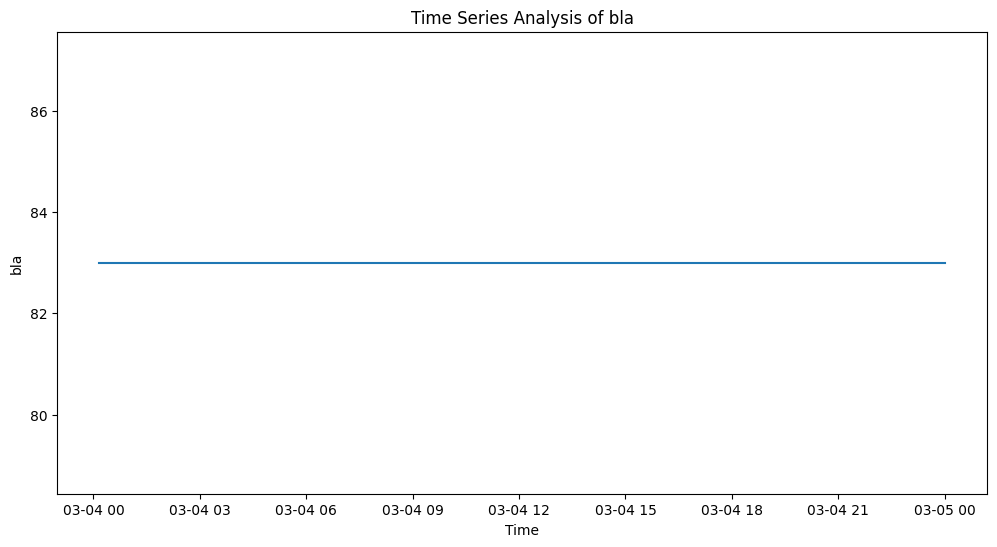

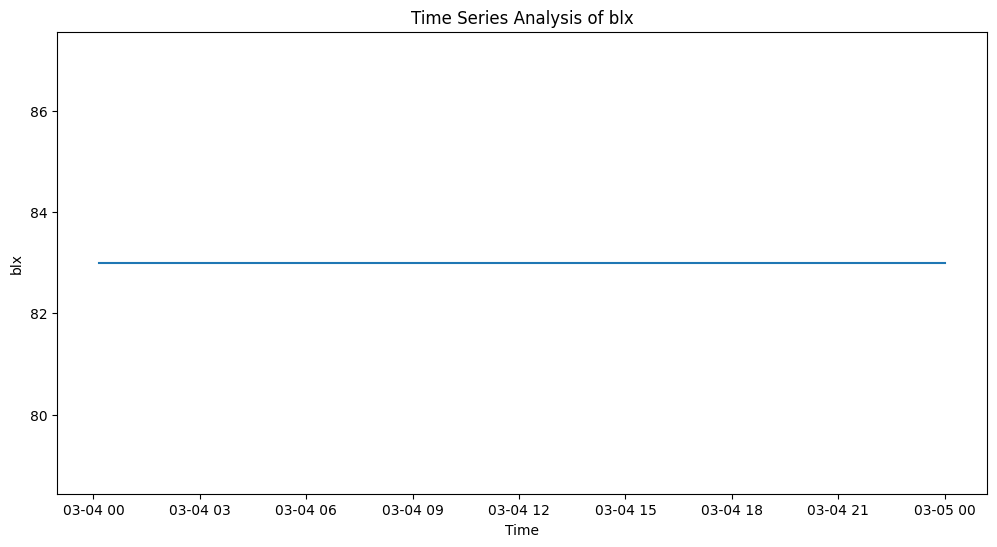

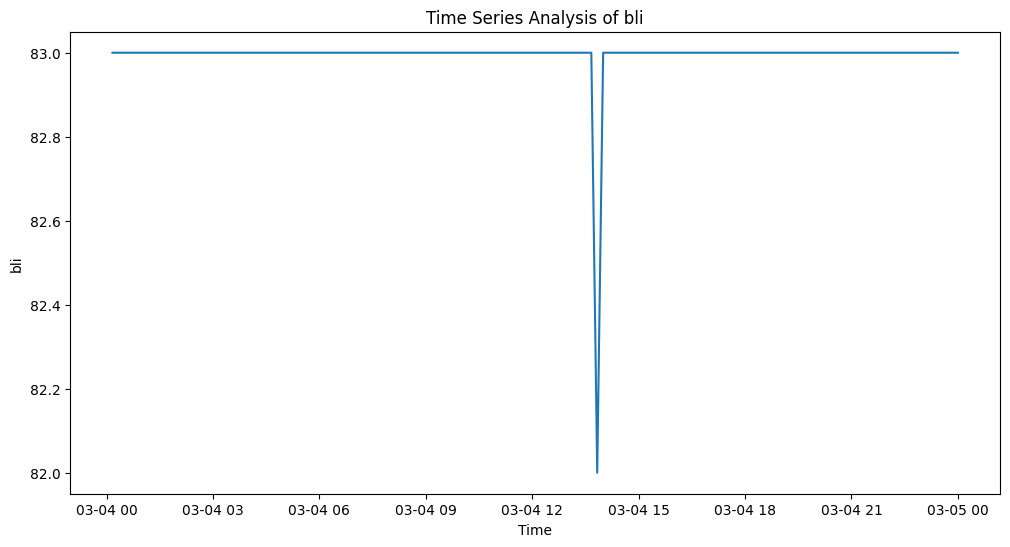

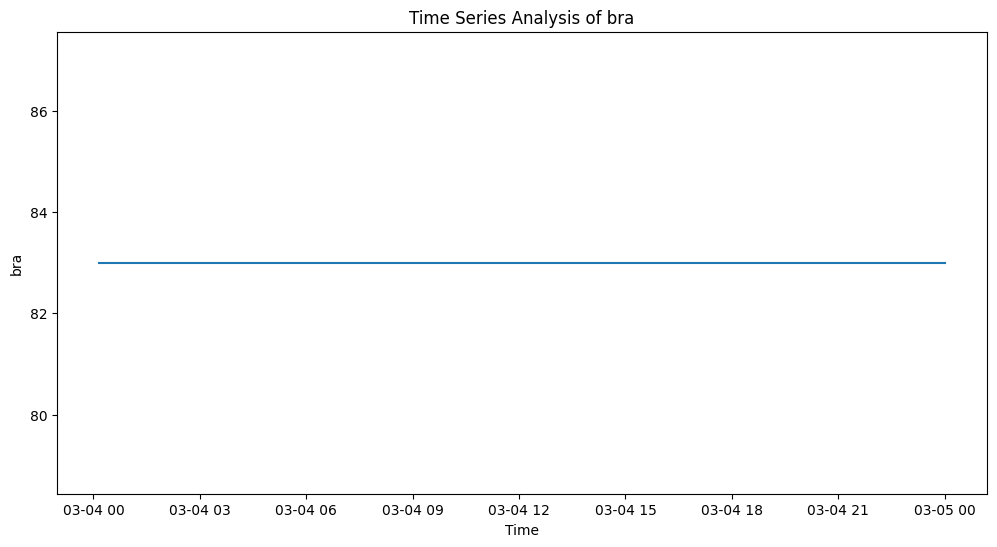

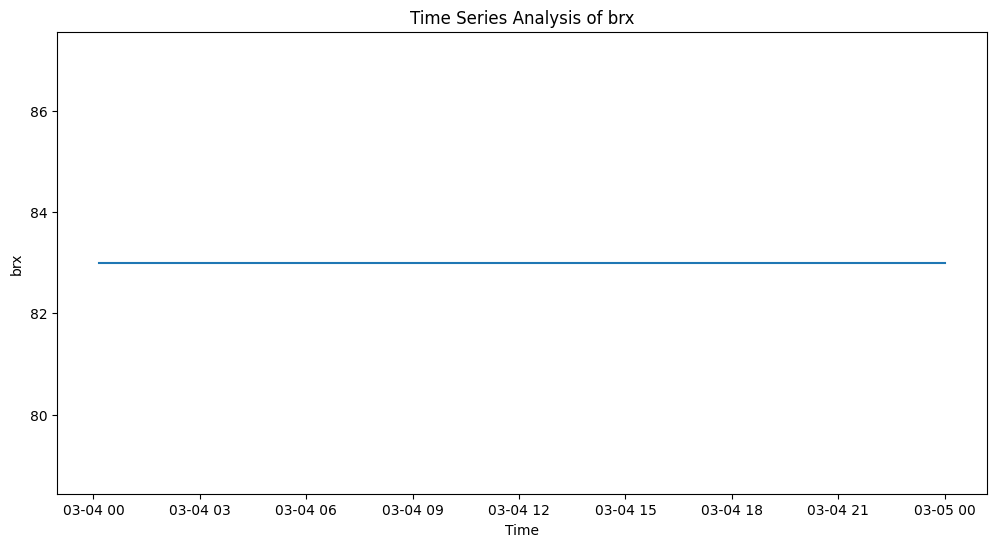

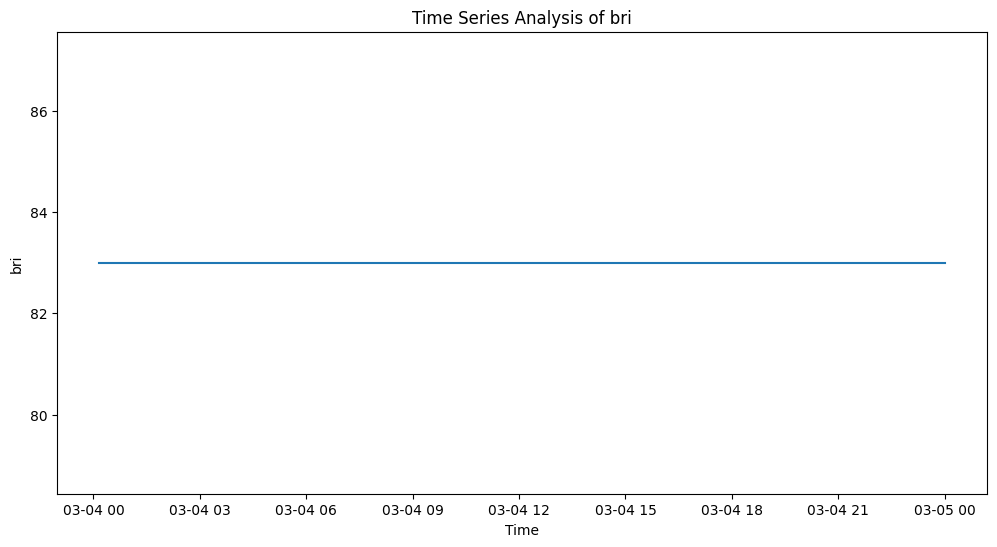

In [16]:
# Perform time series analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=df.index, y=df[column])
        plt.title(f'Time Series Analysis of {column}')
        plt.xlabel('Time')
        plt.ylabel(column)
        plt.show()

In [17]:
# Exclude columns from correlation analysis
columns_to_exclude = ['datetime', 'date', 'time', 'period']
columns_for_correlation = [col for col in df.columns if col not in columns_to_exclude]

# Calculate correlation matrix
correlation_matrix = df[columns_for_correlation].corr()
#print(correlation_matrix)

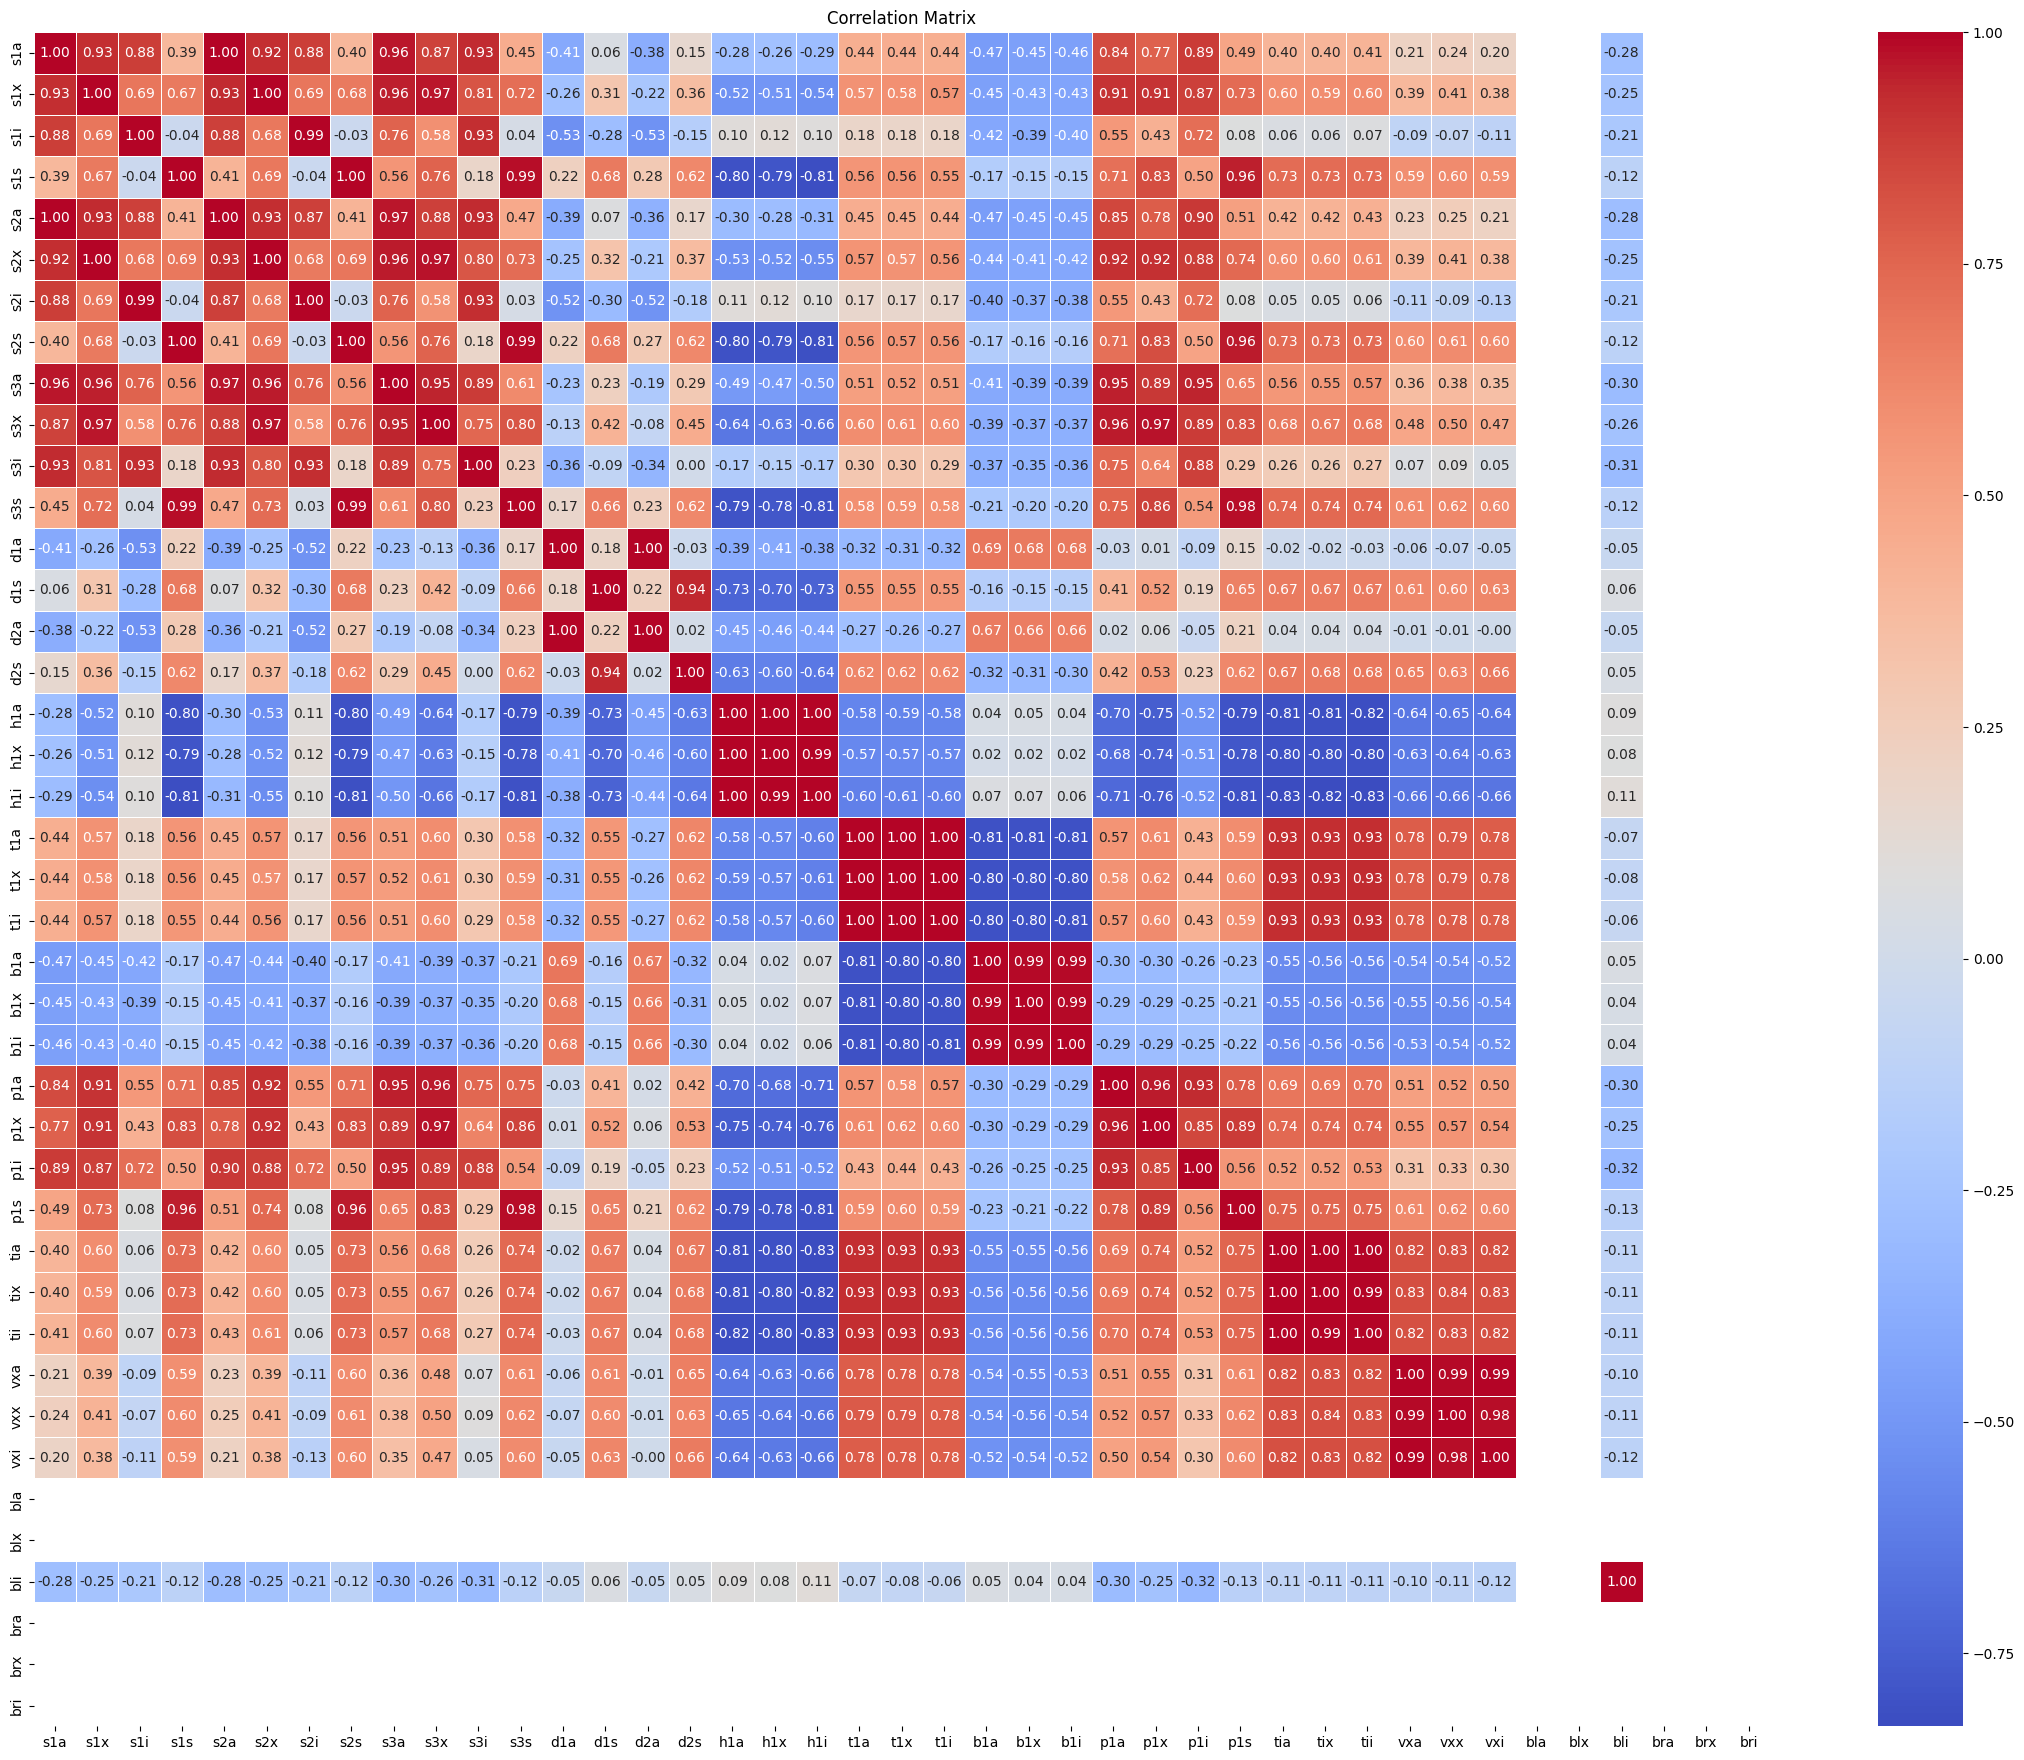

In [18]:
# Create a heatmap for the correlation matrix
#  The heatmap displays the correlation coefficients between different columns. 
# Positive values indicate a positive correlation, while negative values indicate a negative correlation. 
# Values closer to 1 or -1 indicate stronger correlations.
plt.figure(figsize=(28, 22))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

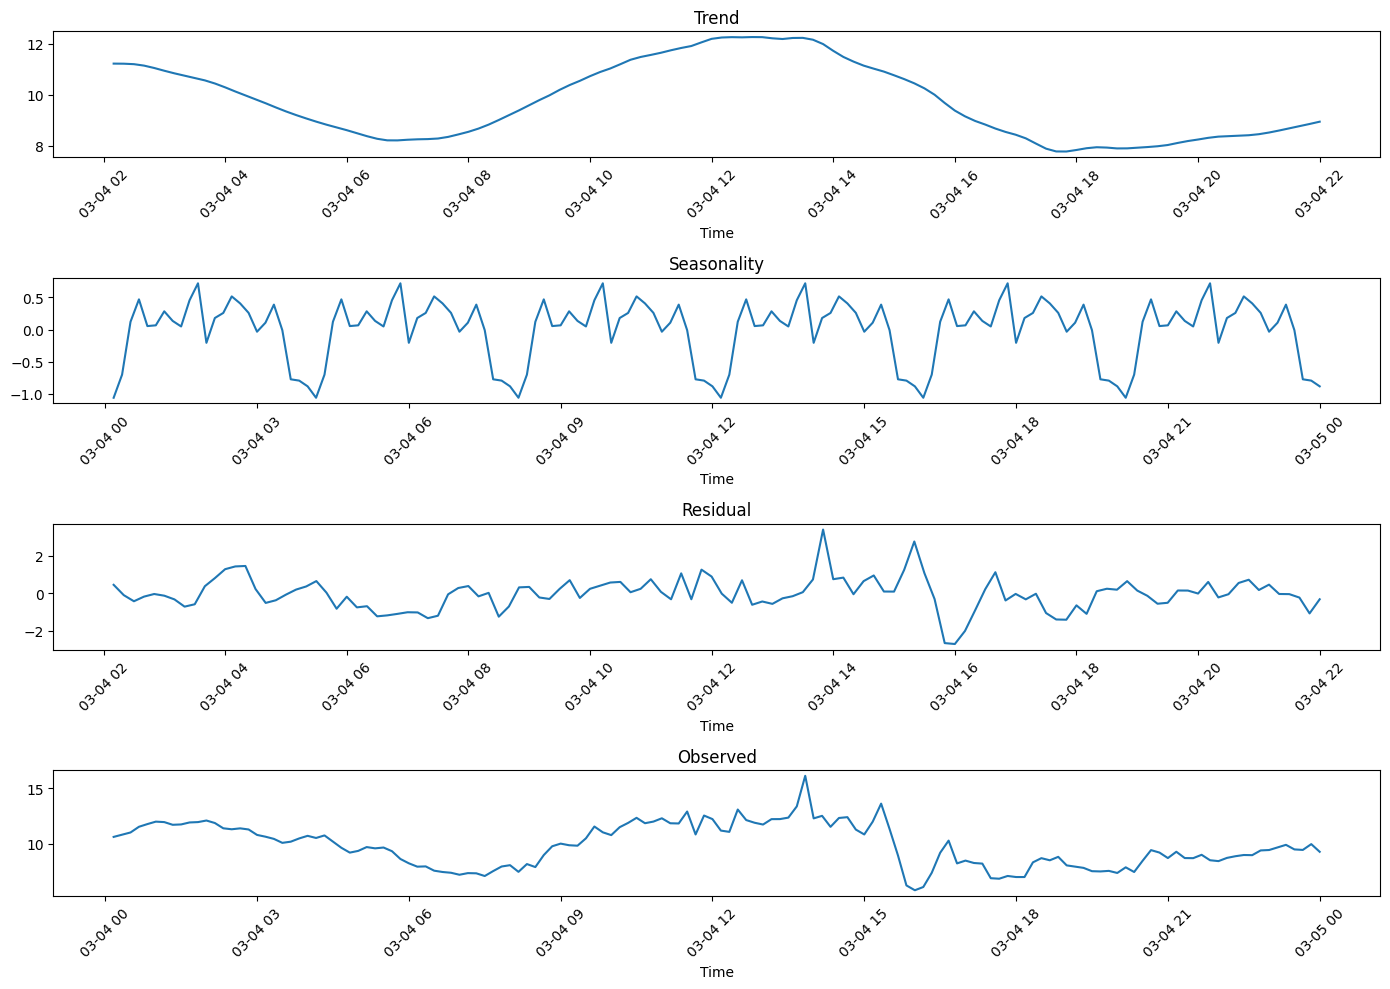

In [19]:
# Decompose the time series into trend, seasonality, and residual components
result = seasonal_decompose(df['s1a'], model='additive', period=24)  # Assuming seasonality is daily (24 hours)

# Increase figure size
plt.figure(figsize=(14, 10))

# Plot decomposed components
plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonality')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residual')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 4)
plt.plot(result.observed)
plt.title('Observed')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


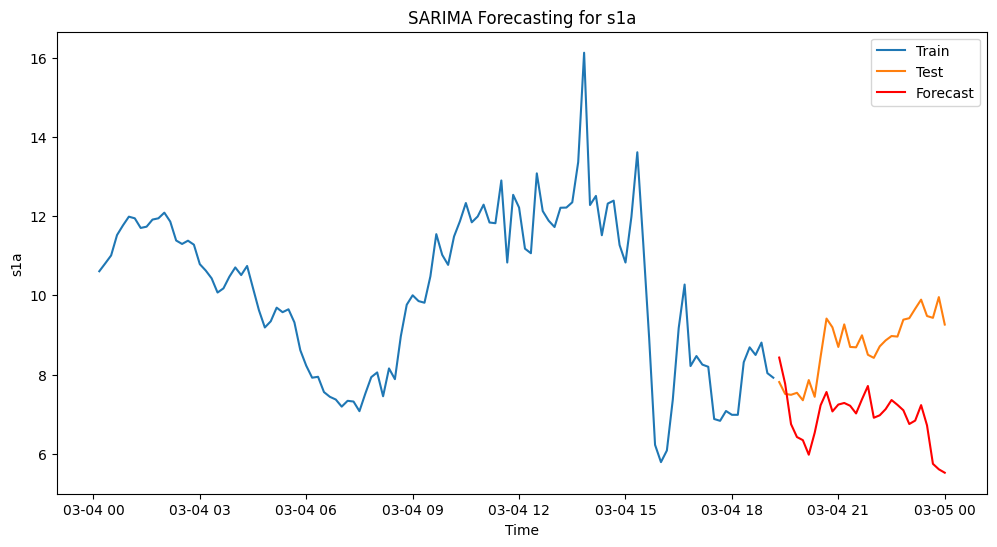

In [20]:
# Forecasting using SARIMA (Seasonal AutoRegressive Integrated Moving Average)
# Train-test split
train_size = int(len(df['s1a']) * 0.8)
train, test = df['s1a'][:train_size], df['s1a'][train_size:]

# Model fitting
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))  # Adjust order and seasonal_order as needed
fit_model = model.fit(disp=False)

# Forecast
forecast = fit_model.get_forecast(steps=len(test))
predicted_values = forecast.predicted_mean

# Visualize
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predicted_values, label='Forecast', color='red')
plt.title('SARIMA Forecasting for s1a')
plt.xlabel('Time')
plt.ylabel('s1a')
plt.legend()
plt.show()